<h1><center> MSIN0166: Data Engineering Individual Assignment</h1>
    <h2><center> Due: 26 April 10:00am</h2>

word count: 2894

* [1.0 Introduction](#1.0-Introduction)
    * [1.1 Background](#1.1-Background)
    * [1.2 Objectives](#1.2-Objectives)
* [2.0 Methodology](#2.0-Methodology)
    * [2.1 Data Storage](#2.1-Data-Storage)
    * [2.2 Source Version Control](#2.2-Source-Version-Control)
    * [2.3 Deployment Automation](#2.3-Deployment-Automation)
    * [2.4 Data Lineage](#2.4-Data-Lineage)
* [3.0 Data Mining](#3.0-Data-Mining)
    * [3.1 Companies Data](#3.1-Companies-Data)
    * [3.2 U.S. Fuel Price](#3.2-U.S.-Fuel-Price)
    * [3.3 UK Fuel Price](#3.3-UK-Fuel-Price)
* [4.0 Data Transformation](#4.0-Data-Transformation)
    * [4.1 UGA](#4.1-UGA)
    * [4.2 Shell](#4.2-Shell)
    * [4.3 U.S. Fuel Price](#4.3-U.S.-Fuel-Price)
    * [4.4 UK Fuel Price](#4.4-UK-Fuel-Price)
* [5.0 Write into PostgreSQL database](#5.0-Write-into-PostgreSQL-database)
    * [5.1 SQL Query Example](#5.1-SQL-Query-Example)
* [6.0 Machine Learning](#6.0-Machine-Learning)
    * [6.1 EDA (Exploratory Data Analysis)](#6.1-EDA-(Exploratory-Data-Analysis))
    * [6.2 Linear Regression Model](#6.2-Linear-Regression-Model)
* [7.0 Conclusion](#7.0-Conclusion)
* [8.0 Limitation](#8.0-Limitation)
* [Reference](#Reference)

# 1.0 Introduction
(For PDF, several long outputs like text html have been hided, if want to check the full version, please look up the notebook on GitHub)

Github Link: https://github.com/huizihu00/Indiv.git

## 1.1 Background
The world is changing rapidly, and information could be very complicate to catch even though some of them are of great importance for us to collect and utilize in daily life. That is why the data engineering is essential in the era of big data. Data engineering allows us to not only obtain data via various sources, but also store, structure, and manipulate data, which brings a lot of benefits for us to realize what is going on in the world. In this era, data can be represented in abundant ways, like numeric, literature, pictures and sounds, consequently, in this project, numeric would be the main data format while graphs also play an important role to help understand the dataset. To get the overall picture about what is happening, we might need to grab data from diverse sources, which is what this project tried to do. 

On 24 February 2022, Vladimir Putin, the president of Russia, started its invasion of Ukraine and resulted in more than 5.1 million Ukrainians leaving the country and a quarter of the population displaced. Putin unleashed the biggest war in Europe since World War Two with the justification that modern, Western-leaning Ukraine was a constant threat and Russia could not feel “safe, develop, and exist”. It’s not only about two countries but the whole world, especially for Europe and the United States. According to the United States Energy Information Administration, Russia exported almost 50% of its crude oil and more than 70% of its natural gas to Europe. In other words, Europe is very dependent on Russia for its energy and there is no doubt that this invasion has affected European economy to a great extent. In terms of U.S. economy, it has also been affected because of the rising energy costs. So, how much fuel price has fluctuated during these two months?

## 1.2 Objectives
This project aims to obtain data from multiple sources and restructure them so that some useful information can be revealed in an efficient way. To be more specific, firstly, fuel price in the U.S. and UK were looked at and analyzed to see the fluctuate rate for the past two months so that we are able to realize how much impact the invasion has brought to our daily life. Secondly, two energy companies’ performance were also checked, which served as a reference for other companies. Thirdly, machine learning models were introduced in this project to make prediction on the fuel price in the future.


# 2.0 Methodology

## 2.1 Data Storage
The reason we want to gather data and structure them is to obtain information, so it is important to store them in an efficient way when querying. PostgreSQL, as a free and open-source relational database management system, will be a good choice to keep the data consistent and ordered. Also, in this project, data sets were collected from different ways, as a result, they were in distinct formats and would bring lots of trouble to deal with. To solve this problem, stored them in a uniformed format is important. Every time after cleaning and extracting useful data sets, all data was stored in Parquet format. As an column-based file format, parquet organizes data by column, instead of by row. Therefore, it can store data in an efficient way in terms of querying, especially in a big dataset. What’s more, PostgreSQL and Parquet are “student friendly” because both are free to use. Last but not least, schema has been created with six tables to classify our data based on their attributes so that data can be displayed clearly when others want to use our data.

## 2.2 Source Version Control
Source version control plays an important role in data engineering project since it can track and manage changes to code, especially when you have multiple sources of data and need to do a lot of data transformation. Git was used through the project to make sure the evolution has been recorded and future adjustments can be added whenever required. It could be a useful tool when making changes to files in order to avoid conflicts.





## 2.3 Deployment Automation
 In this case, Terraform, as a cloud deployment, was connected to Github actions so that Github can automatically notify Terraform of changes to code at the Version Control Software layer. It also benefits users of debugging. Having such automation process, the event data will be delivered consistently and more accurately. During the connecting process, AWS access key and secret key were required to authenticate, which can be very useful in a group project to make sure every group member uploads their files into correct path and prevent from merging conflicts.

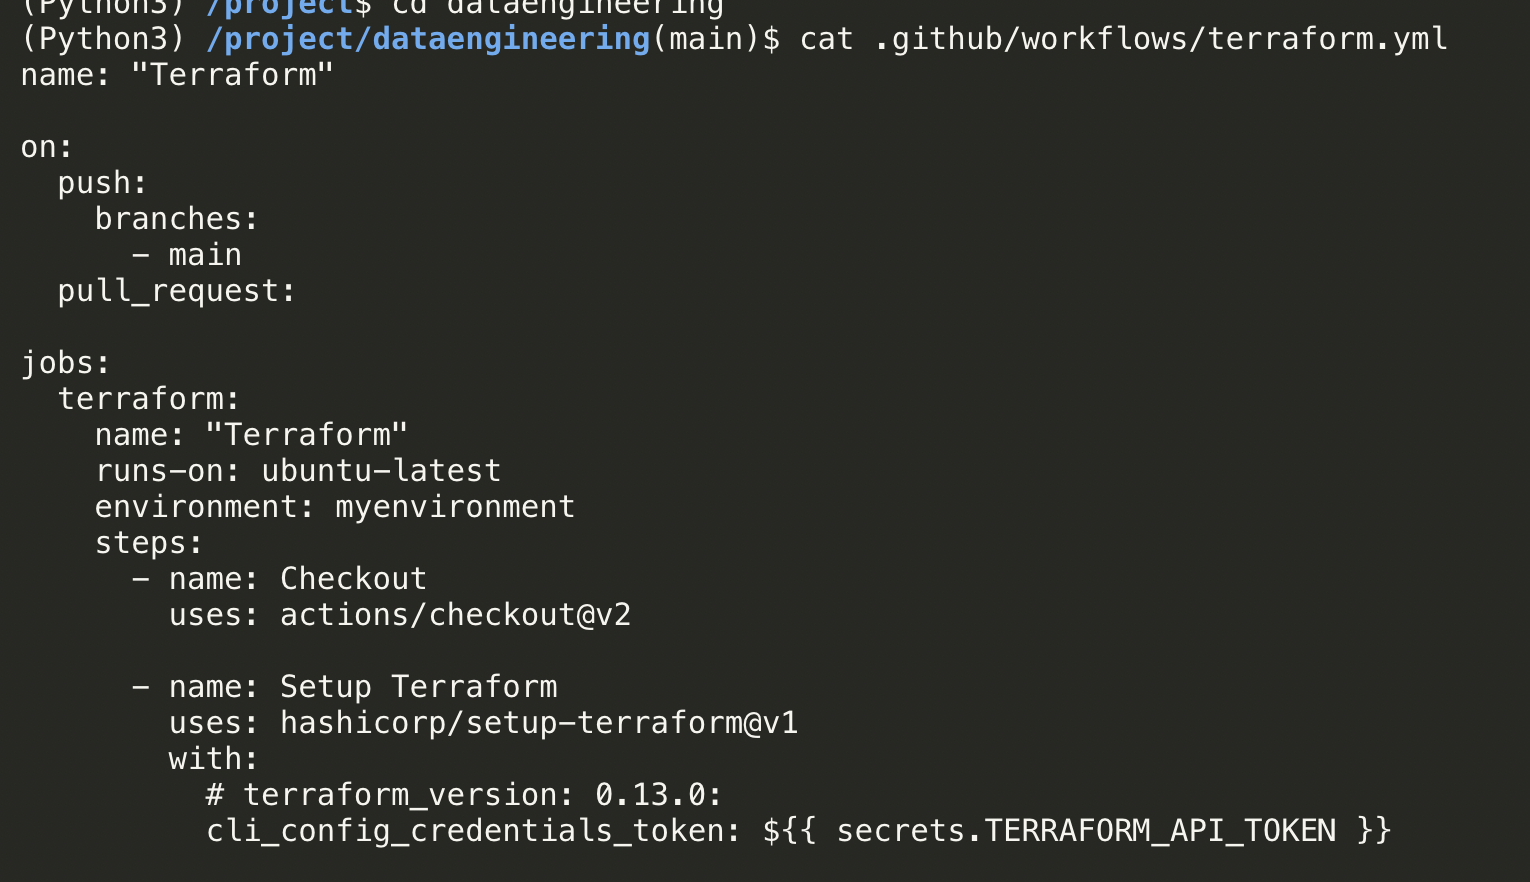

In [10]:
from IPython.display import Image

Image("/project/DataEngineering/picture_files/Terraform.png", width =600)

## 2.4 Data Lineage
DVC has been applied to track dataset throughout this project to make sure every change has been made correctly. It is very critical to track those changes especially when plenty of data transformation tasks are going on. DVC tracks datasets and ML projects, suits multiple types of storages, runs on top of a git repository, and supports building and running pipelines. 

In order to improve the automation, auto_script has been written. Whenever users wants to check the adjustments made on the dataset, using this script can automatically check the dataset status and make sure everything has been done correctly.

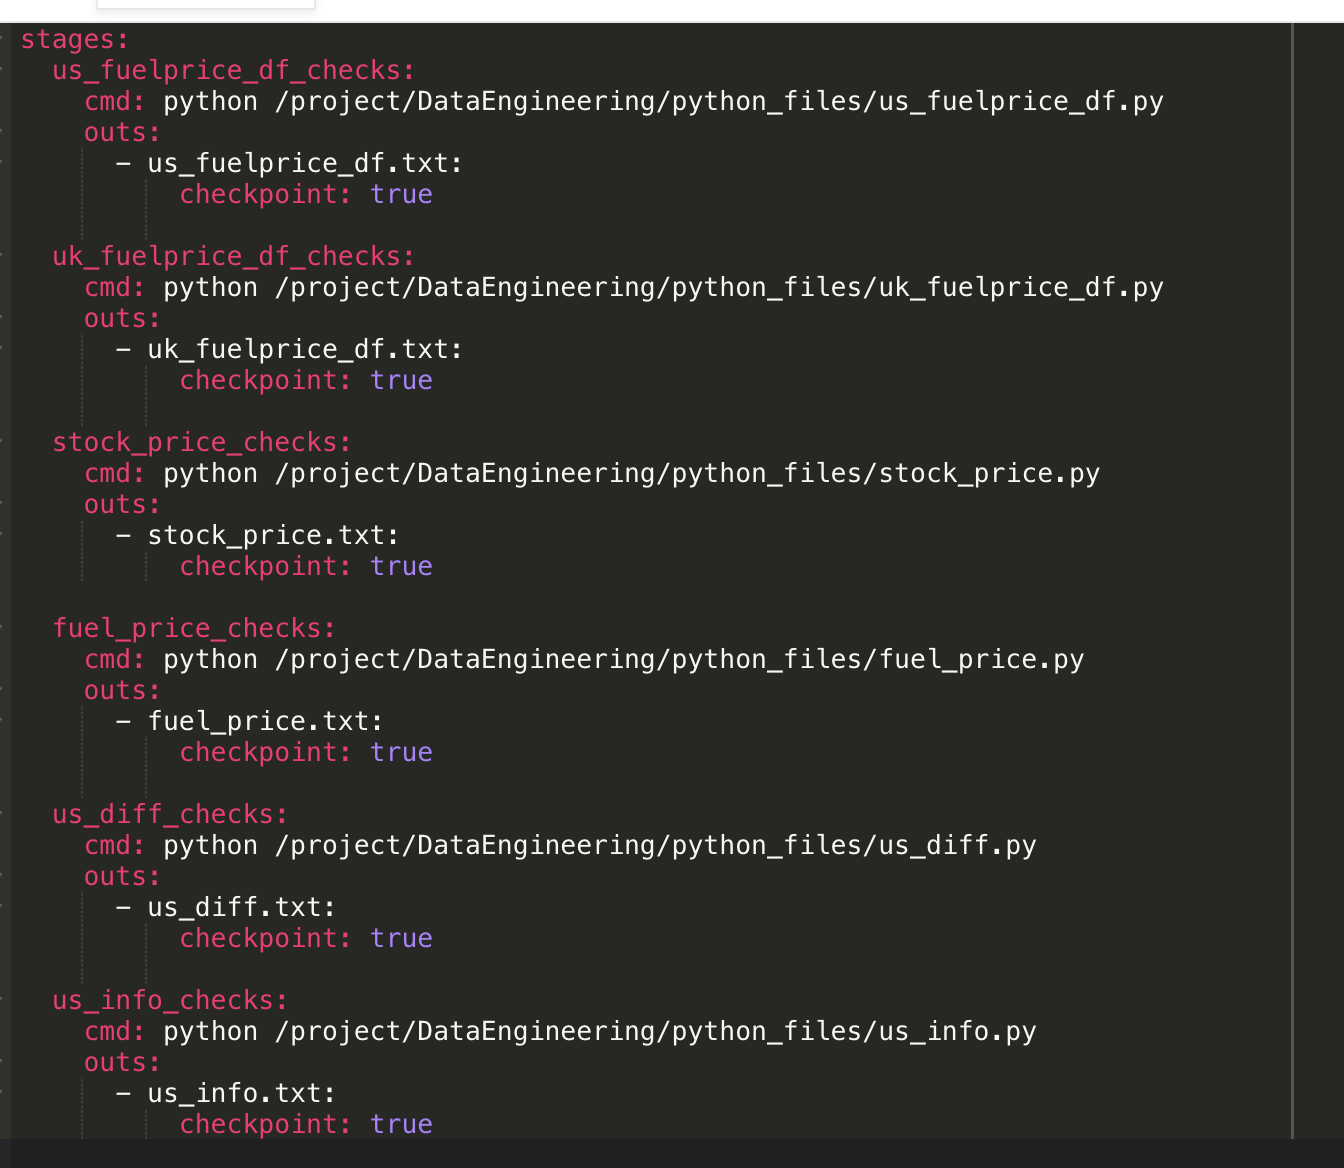

In [11]:
Image("/project/DataEngineering/picture_files/dvc.yaml.png", width=600)

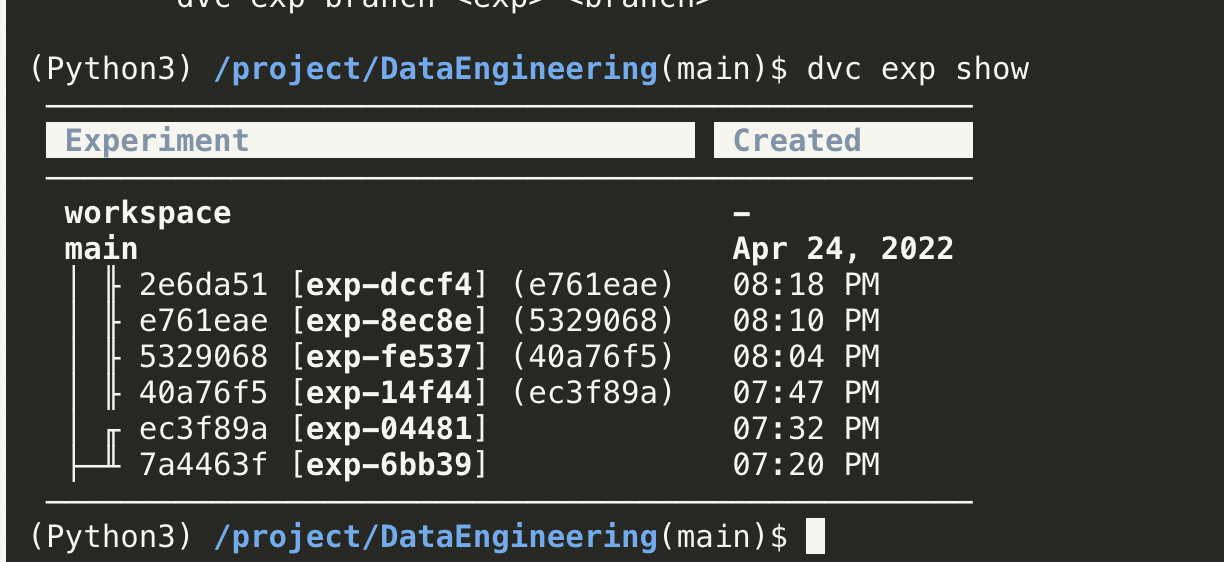

In [12]:
Image("/project/DataEngineering/picture_files/DVC check.png", width = 600)

# 3.0 Data Mining

In [140]:
!pip install dvc
from dvc.api import make_checkpoint

In [8]:
!pip install pyspark
!bash install_spark.sh


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

In [141]:
#Import needed packages 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
from bs4 import BeautifulSoup
import requests
from requests import get
import json
from io import StringIO
import re
import os
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
from datetime import datetime
import csv

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [142]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/project/spark-3.2.1-bin-hadoop3.2"

In [143]:
spark = SparkSession \
    .builder \
    .appName("PySpark App") \
    .config("spark.jars", "postgresql-42.3.2.jar") \
    .getOrCreate()

## 3.1 Companies Data
Historic data of United States Gasoline (UGA) and Shell plc(SHEL.L) were collected from Yahoo Finance to see the relationship between fuel price and stock price of gasoline related company. As mentioned before, during the past two months, the invasion had brought enormous impact in terms of gasoline price and natural gas in Europe and the U.S. The existence of impact is absolute, but the extent is still unrevealed, so this project will focus on the stock price and their stock volume. The webpage is shown below. As we can see, there are all kinds of information about UGA here, like summary, chart, profile and Options, etc, we want to focus on the Historic Data at this stage.


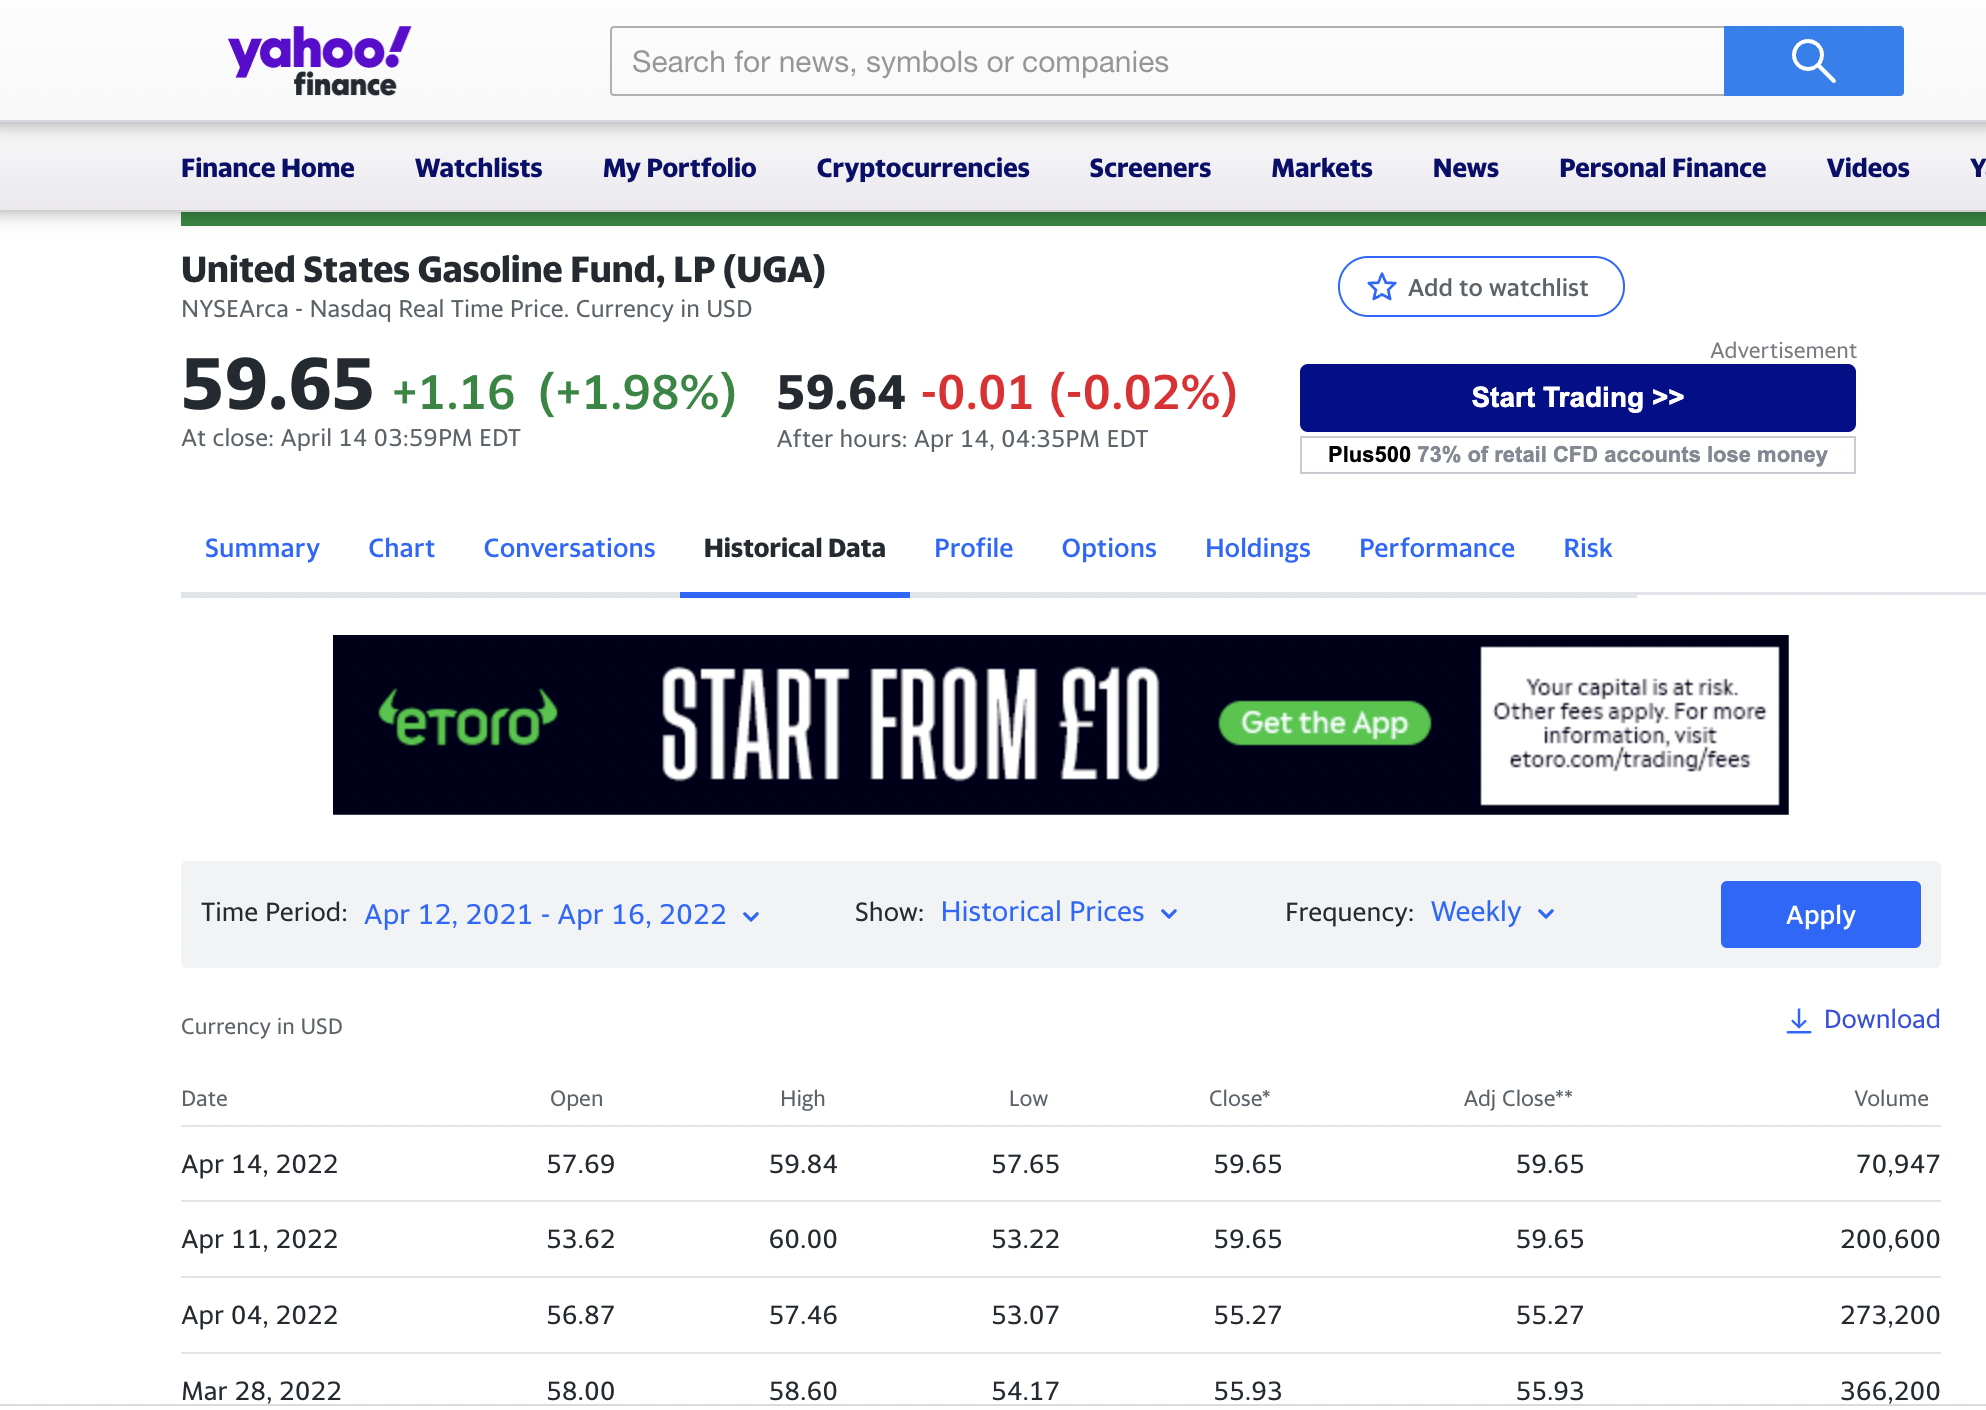

In [15]:
Image("/project/DataEngineering/picture_files/uga_stock.png", width = 600)

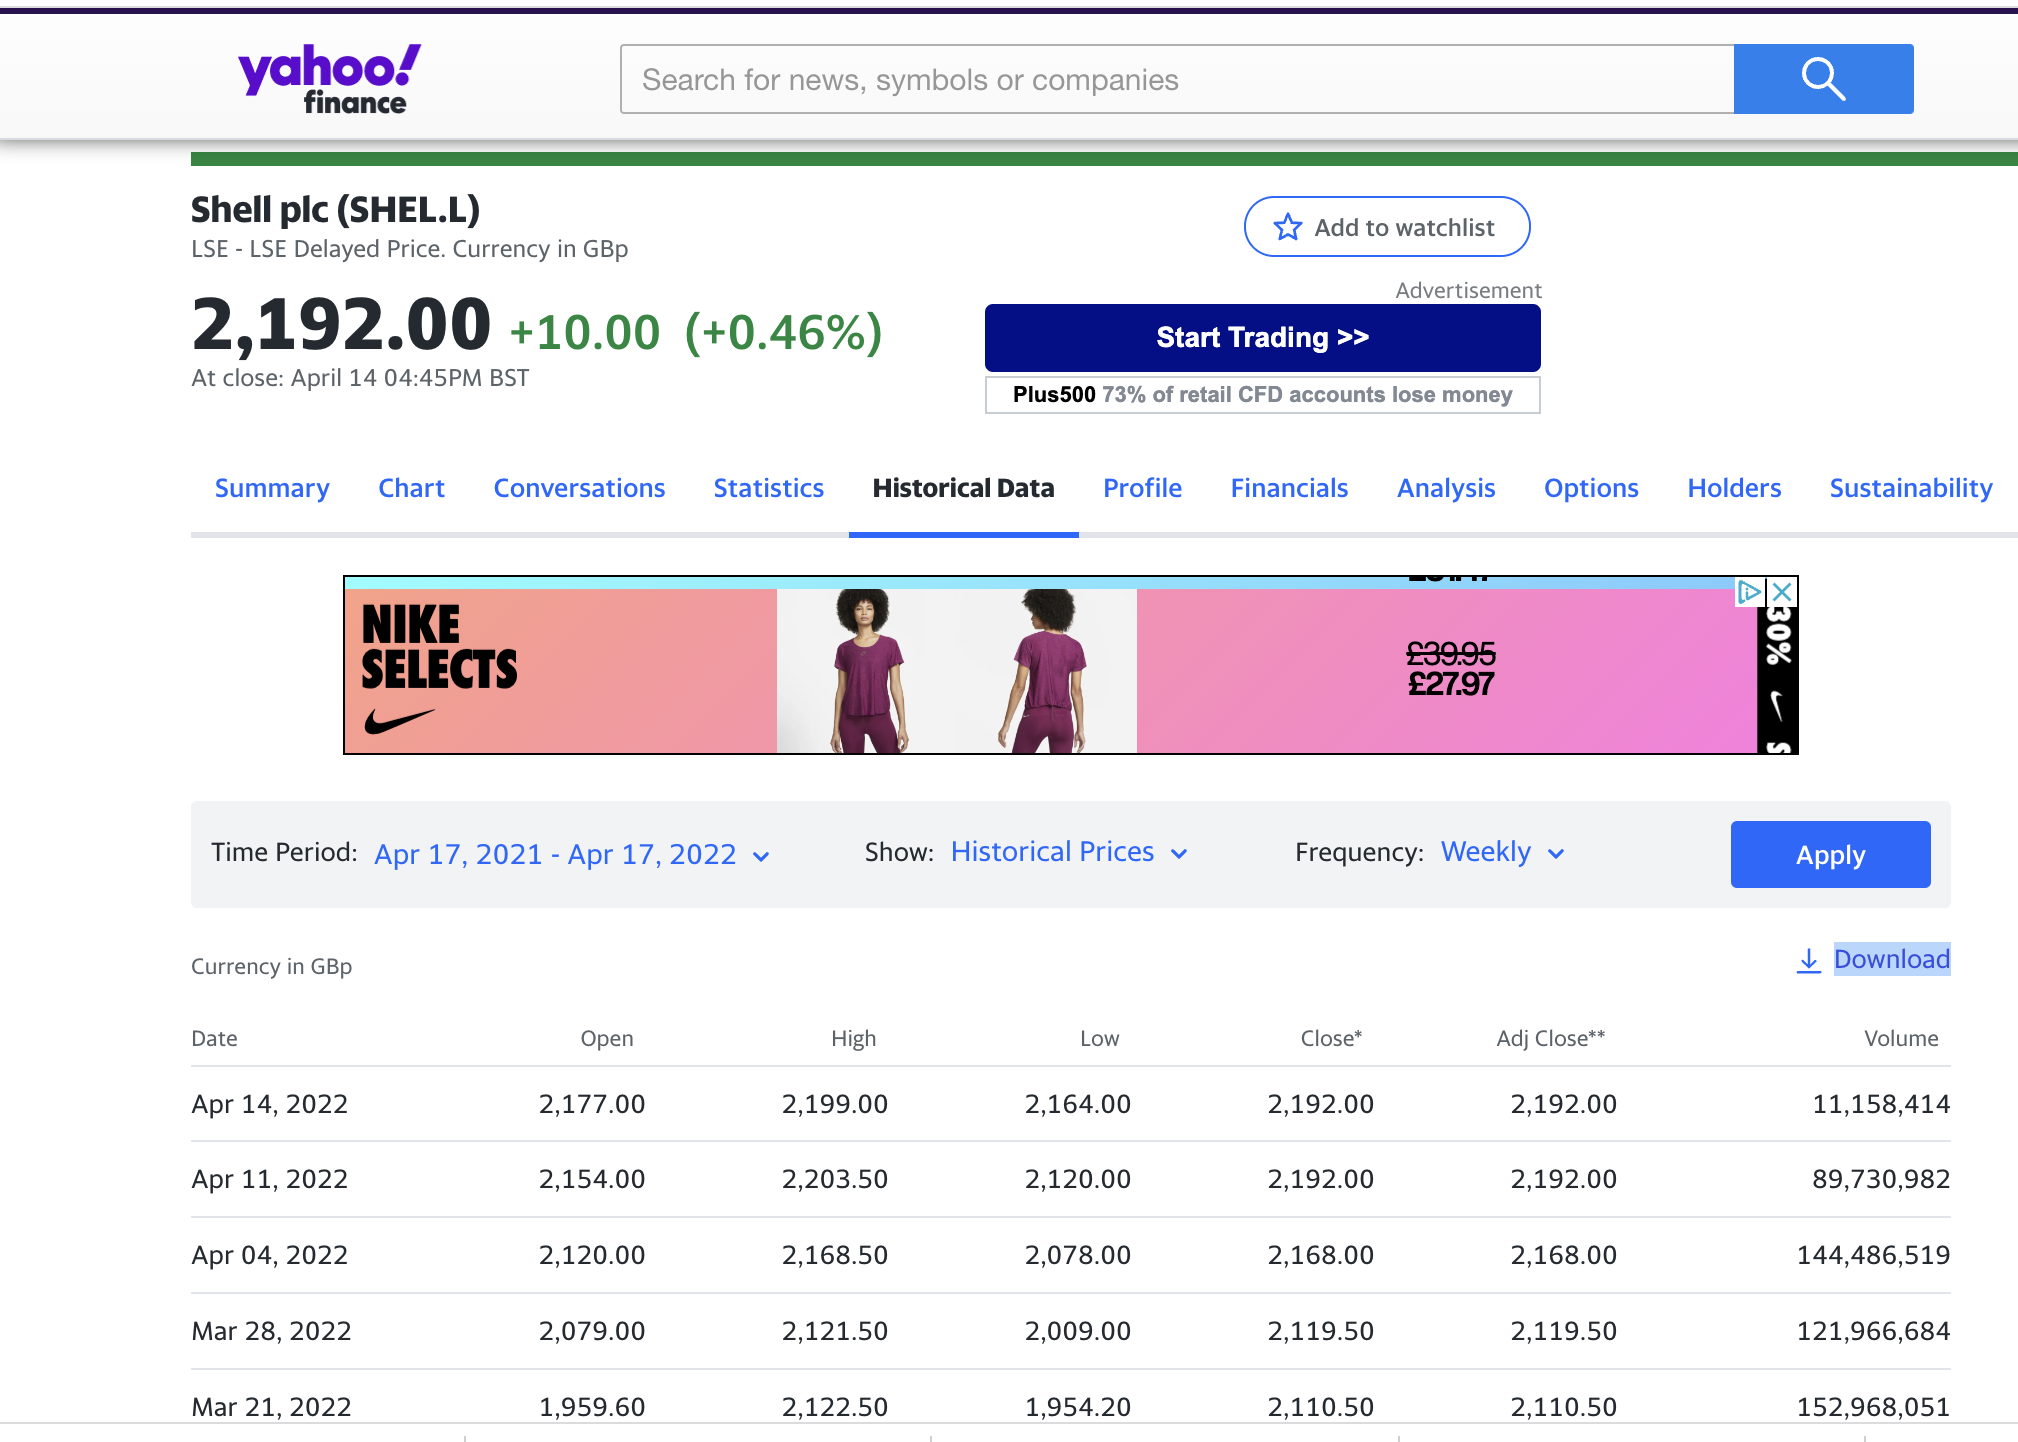

In [16]:
Image("/project/DataEngineering/picture_files/shell_stock.png", width = 600)

The data was accessed via API. Since two companies need to be taken account, it will be repetitive to do the same thing twice. Rather than web scrapping directly, I defined a function so that data from other companies during different time slots can be accessible for other users. Also, by doing so, the usability for others can be improved. 



In [144]:
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36'}

def get_response(stock):
    
    '''
    Self-defined function to get the content of html based on time series
    '''
    
    # Set company url
    stock_url = "https://query1.finance.yahoo.com/v7/finance/download/{}?"

    # Set time parameters
    params ={ 
    'period1' : '1334707200',
    'period2' : '1650240000',
    'interval':  '1wk',
    'events': 'history'}
    
    # Get html response
    response = requests.get(stock_url.format(stock), params= params, headers=header)
    
    return response

uga = get_response("UGA")
shell = get_response("SHEL.L")

In [145]:
def collect_data(response):
    file = StringIO(response.text)
    reader = csv.reader(file)
    data = list(reader)
    return data

uga_info = collect_data(uga)
shell_info = collect_data(shell)

In [146]:
len(uga_info)
len(shell_info)

523

524

In [147]:
uga_info[:3]
shell_info[:3]

[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
 ['2012-04-16',
  '55.930000',
  '56.150002',
  '54.439999',
  '54.849998',
  '54.849998',
  '517500'],
 ['2012-04-23',
  '54.200001',
  '55.360001',
  '54.080002',
  '55.119999',
  '55.119999',
  '412200']]

[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
 ['2012-04-16',
  '2158.000000',
  '2167.000000',
  '2082.500000',
  '2136.500000',
  '1212.857300',
  '9858753'],
 ['2012-04-23',
  '2121.000000',
  '2202.000000',
  '2085.500000',
  '2188.000000',
  '1242.093384',
  '20392958']]

In [148]:
# Create dataframe for uga_stockprice
def new_fun(values):
    dic = dict(zip(uga_info[0], values))
    return dic

uga_values = [uga_info[1:][i] for i in range(522)]
rename = map(new_fun, uga_values)

uga_stockprice = pd.DataFrame(rename)
uga_stockprice.rename(columns = {'Adj Close':'Adj_Close'}, inplace=True)
uga_stockprice.head()

Date       Open       High        Low      Close  Adj_Close  Volume
0  2012-04-16  55.930000  56.150002  54.439999  54.849998  54.849998  517500
1  2012-04-23  54.200001  55.360001  54.080002  55.119999  55.119999  412200
2  2012-04-30  55.020000  55.160000  51.770000  52.259998  52.259998  694200
3  2012-05-07  52.080002  53.139999  51.570000  52.750000  52.750000  533400
4  2012-05-14  51.970001  52.200001  50.419998  50.549999  50.549999  231800

In [149]:
# Create dataframe for shell_stockprice
def new_fun(values):
    dic = dict(zip(shell_info[0], values))
    return dic
shell_values = [shell_info[1:][i] for i in range(522)]
rename = map(new_fun, shell_values)

shell_stockprice = pd.DataFrame(rename)
shell_stockprice.rename(columns = {'Adj Close':'Adj_Close'}, inplace=True)
shell_stockprice

Date         Open         High          Low        Close  \
0    2012-04-16  2158.000000  2167.000000  2082.500000  2136.500000   
1    2012-04-23  2121.000000  2202.000000  2085.500000  2188.000000   
2    2012-04-30  2186.000000  2220.214111  2132.000000  2142.000000   
3    2012-05-07  2142.000000  2152.500000  2018.500000  2067.000000   
4    2012-05-14  2051.500000  2051.500000  1956.500000  1982.000000   
..          ...          ...          ...          ...          ...   
517  2022-03-14  1955.400024  1965.599976  1871.199951  1941.800049   
518  2022-03-21  1959.599976  2122.500000  1954.199951  2110.500000   
519  2022-03-28  2079.000000  2121.500000  2009.000000  2119.500000   
520  2022-04-04  2120.000000  2168.500000  2078.000000  2168.000000   
521  2022-04-11  2154.000000  2203.500000  2120.000000  2192.000000   

       Adj_Close     Volume  
0    1212.857300    9858753  
1    1242.093384   20392958  
2    1215.979614   13495471  
3    1173.403320   15040906  
4    1140.421387   18347443  
..           ...        ...  
517  1941.800049  146845246  
518  2110.500000  152968051  
519  2119.500000  121966684  
520  2168.000000  144486519  
521  2192.000000   89730982  

[522 rows x 7 columns]

In [150]:
# Convert the pandas dataframe into spark dataframe
uga_stockprice = spark.createDataFrame(uga_stockprice)
shell_stockprice = spark.createDataFrame(shell_stockprice)

In [151]:
uga_stockprice.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Adj_Close: string (nullable = true)
 |-- Volume: string (nullable = true)



In [152]:
shell_stockprice.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Adj_Close: string (nullable = true)
 |-- Volume: string (nullable = true)



In [153]:
# Store stockprice into parquet format
uga_stockprice.write.parquet("/project/DataEngineering/parquet_files/uga_info.parquet", mode = 'overwrite')
shell_stockprice.write.parquet("/project/DataEngineering/parquet_files/shell_info.parquet", mode = 'overwrite')

## 3.2 U.S. Fuel Price
   To dive into the most crucial dataset, BeautifulSoup has been introduced to web scrape U.S. Fuel Price from 05/12/1994 to 18/04/2022. The data source is from U.S. Energy Information Administration which gives weekly U.S. all grades conventional retail gasoline price, which is reliable.

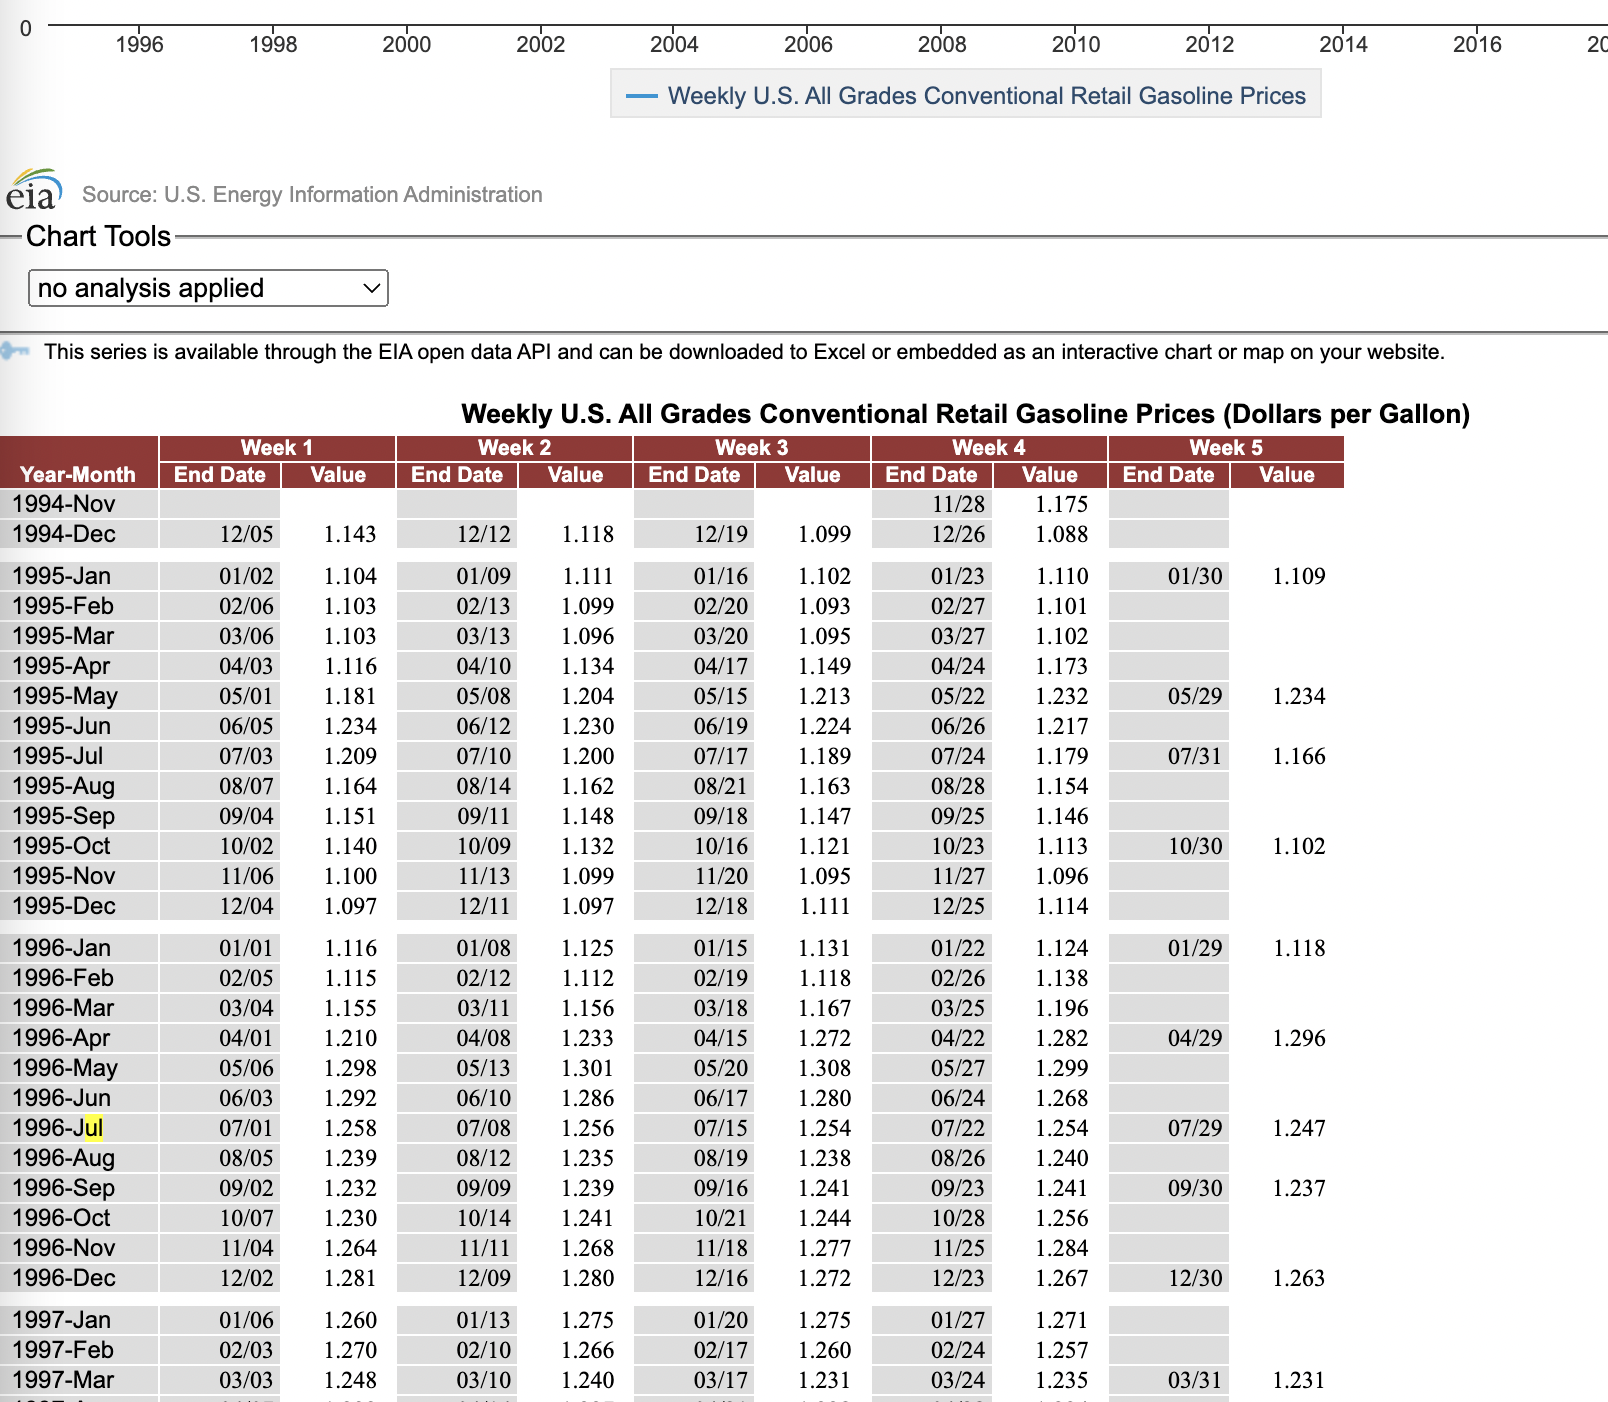

In [27]:
Image("/project/DataEngineering/picture_files/US_fuelprice.png", width=600)

In [169]:

us_url = 'https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPM0U_PTE_NUS_DPG&f=W'
r = requests.get(us_url)

# Check status
r.status_code

# Get text from website
soup= BeautifulSoup(r.text, 'lxml')
r.text

In [155]:
# Web scrape raw data
table = soup.find('table', {'class' : "FloatTitle"})

row_data=[]
for row in table.find('tbody').find_all('tr')[1:]:
    data = row.find_all('td')
    col = [td.text.strip() for td in data]
    row_data.append(col);

In [156]:
len(row_data)

357

In [157]:
# Deal with blank space
for i in row_data:
    if len(i) < 10:
        row_data.remove(i)
        
len(row_data)

329

In [158]:
# Reset date format 
for i in row_data:
    i[1] = i[0][:4]+ '/' + i[1]
    i[3] = i[0][:4]+ '/' + i[3]
    i[5] = i[0][:4]+ '/' + i[5]
    i[7] = i[0][:4]+ '/' + i[7]
    i[9] = i[0][:4]+ '/' + i[9] 
    
df = pd.DataFrame(row_data)

In [33]:
df

0           1      2           3      4           5      6   \
0    1994-Dec  1994/12/05  1.143  1994/12/12  1.118  1994/12/19  1.099   
1    1995-Jan  1995/01/02  1.104  1995/01/09  1.111  1995/01/16  1.102   
2    1995-Feb  1995/02/06  1.103  1995/02/13  1.099  1995/02/20  1.093   
3    1995-Mar  1995/03/06  1.103  1995/03/13  1.096  1995/03/20  1.095   
4    1995-Apr  1995/04/03  1.116  1995/04/10  1.134  1995/04/17  1.149   
..        ...         ...    ...         ...    ...         ...    ...   
324  2021-Dec  2021/12/06  3.279  2021/12/13  3.252  2021/12/20  3.229   
325  2022-Jan  2022/01/03  3.216  2022/01/10  3.238  2022/01/17  3.255   
326  2022-Feb  2022/02/07  3.401  2022/02/14  3.441  2022/02/21  3.480   
327  2022-Mar  2022/03/07  4.031  2022/03/14  4.252  2022/03/21  4.165   
328  2022-Apr  2022/04/04  4.096  2022/04/11  4.019  2022/04/18  3.992   

             7      8           9      10  
0    1994/12/26  1.088       1994/         
1    1995/01/23  1.110  1995/01/30  1.109  
2    1995/02/27  1.101       1995/         
3    1995/03/27  1.102       1995/         
4    1995/04/24  1.173       1995/         
..          ...    ...         ...    ...  
324  2021/12/27  3.211       2021/         
325  2022/01/24  3.271  2022/01/31  3.321  
326  2022/02/28  3.554       2022/         
327  2022/03/28  4.152       2022/         
328       2022/              2022/         

[329 rows x 11 columns]

In [159]:
# Use zip function to match the fuel price with corresponding date
dictionary = dict(zip(df[1], df[2]))
i=3

while i <=9:
    diction = dict(zip(df[i], df[i+1]))
    dictionary.update(diction)
    i+=2

In [162]:
# Turn into pandas dataframe
us_fuelprice = pd.DataFrame(list(dictionary.items()),columns = ['Date','Price'] )
us_fuelprice

Date  Price
0     1994/12/05  1.143
1     1995/01/02  1.104
2     1995/02/06  1.103
3     1995/03/06  1.103
4     1995/04/03  1.116
...          ...    ...
1453  2021/03/29  2.839
1454  2021/05/31  2.997
1455  2021/08/30  3.118
1456  2021/11/29  3.326
1457  2022/01/31  3.321

[1458 rows x 2 columns]

In [163]:
# Deal with missing values
us_fuelprice.drop( (us_fuelprice[us_fuelprice['Price'].map(len) < 1]).index, inplace=True)

# Sort the dataframe by time
us_fuelprice.sort_values(by='Date', inplace= True)

In [164]:
us_fuelprice.reset_index(drop = True, inplace = True)
us_fuelprice = us_fuelprice.rename(columns = {'Date':'date','Price': 'price'})

In [165]:
# Convert into spark dataframe and parquSource version control plays an important role in data engineering project since it can track and manage changes to code, especially when you have multiple sources of data and need to do a lot of data transformation. Git was used through the project to make sure the evolution has been recorded and future adjustments can be added whenever required. It could be a useful tool when making changes to files in order to avoid conflicts.et formate
us_fuelprice_df = spark.createDataFrame(us_fuelprice)
us_fuelprice_df.write.parquet("/project/DataEngineering/parquet_files/us_fuelprice.parquet", mode = 'overwrite')
us_fuelprice_df.printSchema()


root
 |-- date: string (nullable = true)
 |-- price: string (nullable = true)



In [166]:
make_checkpoint()

## 3.3 UK Fuel Price
In order to make comparison, fuel price in UK has also been acquired from Gov.uk, which is credible also. According to this graph, ULSP stands for Ultra low sulphur unleaded petrol, while ULSD stands for Ultra low sulphur diesel. The price is pump price (p/liter). Since for this project, instead of looking purely statistics, we focus on changes and comparisons, part of data could be abandoned. Based on what we found out on U.S. fuel price website, the ULSP price would be the major while ULSD price is not very significant at this stage.
 
Based on the fact that we want to realize the situation for past two months, the time length should be set appropriately and is not necessarily large, which is 10 years. Overall, the volume of dataset was not very large, after consideration, this data was saved as CSV file locally.

In [167]:
# Import excel file about the fuel price in UK
file = pd.read_excel(r'/project/DataEngineering/UK_Weekly_Fuel_Prices.xlsx', sheet_name = 'All years')

In [168]:
file.head(10)

Weekly Prices time series (from 2003)  \
0           ULSP = Ultra low sulphur unleaded petrol   
1                    ULSD = Ultra low sulphur diesel   
2  Duty rates over time can be found in the duty ...   
3  Empty cells represent weeks where differences ...   
4  Freeze panes are turned on. To turn off freeze...   
5                                               Date   
6                                2003-06-09 00:00:00   
7                                2003-06-16 00:00:00   
8                                2003-06-23 00:00:00   
9                                2003-06-30 00:00:00   

                     Unnamed: 1                              Unnamed: 2  \
0                           NaN                                     NaN   
1                           NaN                                     NaN   
2                           NaN                                     NaN   
3                           NaN                                     NaN   
4                           NaN                                     NaN   
5   ULSP:  Pump price (p/litre)  ULSP:  Diff on previous WEEK (p/litre)   
6                     74.590284                                     NaN   
7                     74.469143                               -0.121141   
8                     74.423566                               -0.045577   
9                     74.352421                               -0.071145   

                                Unnamed: 3                Unnamed: 4  \
0                                      NaN                       NaN   
1                                      NaN                       NaN   
2                                      NaN                       NaN   
3                                      NaN                       NaN   
4                                      NaN                       NaN   
5   ULSP: Diff on previous  YEAR (p/litre)  Duty rate ULSP (p/litre)   
6                                      NaN                     45.82   
7                                      NaN                     45.82   
8                                      NaN                     45.82   
9                                      NaN                     45.82   

          Unnamed: 5                  Unnamed: 6  \
0                NaN                         NaN   
1                NaN                         NaN   
2                NaN                         NaN   
3                NaN                         NaN   
4                NaN                         NaN   
5  VAT (% rate) ULSP  ULSD: Pump price (p/litre)   
6               17.5                   76.773394   
7               17.5                   76.689054   
8               17.5                   76.620546   
9               17.5                    76.50526   

                              Unnamed: 7  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
5  ULSD: Diff on previous WEEK (p/litre)   
6                                    NaN   
7                               -0.08434   
8                              -0.068508   
9                              -0.115286   

                               Unnamed: 8                Unnamed: 9  \
0                                     NaN                       NaN   
1                                     NaN                       NaN   
2                                     NaN                       NaN   
3                                     NaN                       NaN   
4                                     NaN                       NaN   
5  ULSD: Diff on previous  YEAR (p/litre)  Duty rate ULSD (p/litre)   
6                                     NaN                     45.82   
7                                     NaN                     45.82   
8                                     NaN                     45.82   
9          

In [42]:
# Extract useful information
file.columns =file.iloc[5]
file = file.iloc[6: , :]

In [43]:
file

5                   Date  ULSP:  Pump price (p/litre)  \
6    2003-06-09 00:00:00                    74.590284   
7    2003-06-16 00:00:00                    74.469143   
8    2003-06-23 00:00:00                    74.423566   
9    2003-06-30 00:00:00                    74.352421   
10   2003-07-07 00:00:00                    74.283737   
..                   ...                          ...   
985  2022-03-14 00:00:00                       159.96   
986  2022-03-21 00:00:00                       165.37   
987  2022-03-28 00:00:00                   162.651769   
988  2022-04-04 00:00:00                       161.91   
989  2022-04-11 00:00:00                       161.78   

5   ULSP:  Diff on previous WEEK (p/litre)  \
6                                      NaN   
7                                -0.121141   
8                                -0.045577   
9                                -0.071145   
10                               -0.068684   
..                                     ...   
985                                   7.01   
986                                   5.41   
987                              -2.718231   
988                              -0.741769   
989                                  -0.13   

5    ULSP: Diff on previous  YEAR (p/litre) Duty rate ULSP (p/litre)  \
6                                       NaN                    45.82   
7                                       NaN                    45.82   
8                                       NaN                    45.82   
9                                       NaN                    45.82   
10                                      NaN                    45.82   
..                                      ...                      ...   
985                               36.059117                    57.95   
986                               40.801753                    57.95   
987                               37.524793                    52.95   
988                               36.669577                    52.95   
989                               36.381801                    52.95   

5   VAT (% rate) ULSP ULSD: Pump price (p/litre)  \
6                17.5                  76.773394   
7                17.5                  76.689054   
8                17.5                  76.620546   
9                17.5                   76.50526   
10               17.5                  76.457376   
..                ...                        ...   
985                20                     169.48   
986                20                     177.47   
987                20                 176.442403   
988                20                        176   
989                20                     176.22   

5   ULSD: Diff on previous WEEK (p/litre)  \
6                                     NaN   
7                                -0.08434   
8                               -0.068508   
9                               -0.115286   
10                              -0.047884   
..                                    ...   
985                                 10.92   
986                                  7.99   
987                             -1.027597   
988                             -0.442403   
989                                  0.22   

5   ULSD: Diff on previous  YEAR (p/litre) Duty rate ULSD (p/litre)  \
6                                      NaN                    45.82   
7                                      NaN                    45.82   
8                                      NaN                    45.82   
9                                      NaN                    45.82   
10                                     NaN                    45.82   
..                                     ...                      ...   
985                              41.236275                    57.95   
986                              48.450879                    57.95   
987                              47.127295                    52.95   
988                  

In [44]:
from datetime import datetime

# Convert into date type
file['Date'] = [i.date() for i in file['Date']]

In [45]:
# Select the first three columms
uk_fuelprice = file.iloc[: ,  :3]
uk_fuelprice.columns = ["date", 'uk_price', 'uk_diff']

In [46]:
# Change the date type
uk_fuelprice['uk_diff'] =[float(i) for i in uk_fuelprice['uk_diff'] ]
uk_fuelprice['uk_diff'].round(decimals = 3)

6        NaN
7     -0.121
8     -0.046
9     -0.071
10    -0.069
       ...  
985    7.010
986    5.410
987   -2.718
988   -0.742
989   -0.130
Name: uk_diff, Length: 984, dtype: float64

In [47]:
uk_fuelprice_df = spark.createDataFrame(uk_fuelprice)
uk_fuelprice_df.printSchema()
uk_fuelprice_df.write.parquet("/project/DataEngineering/parquet_files/uk_fuelprice.parquet", mode= 'overwrite')

root
 |-- date: date (nullable = true)
 |-- uk_price: double (nullable = true)
 |-- uk_diff: double (nullable = true)



In [48]:
make_checkpoint()

# 4.0 Data Transformation

## 4.1 UGA
In this session, related data from UGA historic data were collected and structured. First of all, to improve the work efficiency, the highest stock price, the lowest stock price, the open stock price, and the adjusted close stock price in a week were dropped. We will keep the close price as the real one to take account into. In addition, "uga_Difference" has been created as the highest price minus the lowest one then divided by close price. The purpose of this column is to see the stability of stock within a week a good measurement to test the performance of a stock.  The reason to divide by the stock close price is to scale our data so that we can compare with the fuel price differences.  


In [49]:
uga = spark.read.parquet("/project/DataEngineering/parquet_files/uga_info.parquet").toPandas()

In [50]:
# Change type of data into numeric 
uga['High']= uga['High'].astype(float)
uga['Low']= uga['Low'].astype(float)
uga['Close']= uga['Close'].astype(float)
uga['Volume']= uga['Volume'].astype(float)

In [51]:
# Get difference of stock price within one week
uga['uga_Difference'] = (uga['High'] - uga['Low'])/uga['Close']*100
uga.drop(labels= ['High', 'Low', 'Open', 'Adj_Close'], axis=1, inplace=True)

In [52]:
uga = uga.rename(columns={"Date": "date", "Close":"uga_close", "Volume":"uga_volume", "uga_Difference":"uga_difference"})
uga

date  uga_close  uga_volume  uga_difference
0    2019-10-07  30.459999     37400.0        5.712410
1    2019-10-14  30.000000     31500.0        2.100003
2    2019-10-21  31.139999     37400.0        5.780350
3    2019-10-28  31.540001     50700.0        5.009512
4    2019-11-04  31.170000     49200.0        5.646458
..          ...        ...         ...             ...
517  2019-09-02  28.820000     76200.0        8.501037
518  2019-09-09  28.510000     41200.0        6.453879
519  2019-09-16  30.670000    151100.0        8.444734
520  2019-09-23  29.790001     53200.0        4.867402
521  2019-09-30  29.180000     31000.0        5.277584

[522 rows x 4 columns]

## 4.2 Shell

For Shell historic data, the same transformations as UGA’s have been conducted, including scale the stock price differences to figure out the relationship between changes in fuel price and changes in stock price. After that, two Pandas dataframes were merged into one big data frame and converted to a schema with Parquet format.



In [53]:
shell = spark.read.parquet("/project/DataEngineering/parquet_files/shell_info.parquet").toPandas()
shell

Date         Open         High          Low        Close  \
0    2019-10-07  2317.500000  2347.000000  2278.500000  2290.500000   
1    2019-10-14  2299.000000  2333.489990  2235.500000  2240.000000   
2    2019-10-21  2235.000000  2332.500000    26.087999  2325.500000   
3    2019-10-28  2330.500000  2345.000000  2233.000000  2260.500000   
4    2019-11-04  2269.500000  2356.000000     3.045000  2341.000000   
..          ...          ...          ...          ...          ...   
517  2019-09-02  2281.500000  2308.500000  2246.000000  2259.500000   
518  2019-09-09  2279.000000  2331.500000  2261.000000  2282.500000   
519  2019-09-16  2356.000000  2373.000000  2310.500000  2343.500000   
520  2019-09-23  2353.500000  2414.500000  2311.500000  2408.500000   
521  2019-09-30  2409.000000  2417.000000  2263.500000  2319.000000   

       Adj_Close    Volume  
0    2046.361694  43462714  
1    2001.244629  40636681  
2    2077.631104  28698016  
3    2019.559204  40717990  
4    2091.478760  59819909  
..           ...       ...  
517  2018.665527  32084357  
518  2039.214355  32091732  
519  2093.712891  53935799  
520  2151.784912  45485098  
521  2071.823730  35640122  

[522 rows x 7 columns]

In [54]:
shell.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj_Close    object
Volume       object
dtype: object

In [55]:
shell['High']= shell['High'].astype(float)
shell['Low']= shell['Low'].astype(float)
shell['Close']= shell['Close'].astype(float)
shell['Volume']= shell['Volume'].astype(float)

In [56]:
shell['shell_Difference'] = (shell['High'] - shell['Low'])/shell['Close']*100
shell.drop(labels= ['High', 'Low', 'Open', 'Adj_Close'], axis=1, inplace=True)
shell = shell.rename(columns={"Date":"date", "Close":"shell_close", "Volume":"shell_volume", "shell_Difference" : "shell_difference"})

In [57]:
shell.head()

date  shell_close  shell_volume  shell_difference
0  2019-10-07       2290.5    43462714.0          2.990613
1  2019-10-14       2240.0    40636681.0          4.374553
2  2019-10-21       2325.5    28698016.0         99.179187
3  2019-10-28       2260.5    40717990.0          4.954656
4  2019-11-04       2341.0    59819909.0        100.510679

In [58]:
# Merge two dataframes into one
stock_price = pd.merge(uga, shell, on='date')

In [59]:
stock_price

date  uga_close  uga_volume  uga_difference  shell_close  \
0    2019-10-07  30.459999     37400.0        5.712410       2290.5   
1    2019-10-14  30.000000     31500.0        2.100003       2240.0   
2    2019-10-21  31.139999     37400.0        5.780350       2325.5   
3    2019-10-28  31.540001     50700.0        5.009512       2260.5   
4    2019-11-04  31.170000     49200.0        5.646458       2341.0   
..          ...        ...         ...             ...          ...   
517  2019-09-02  28.820000     76200.0        8.501037       2259.5   
518  2019-09-09  28.510000     41200.0        6.453879       2282.5   
519  2019-09-16  30.670000    151100.0        8.444734       2343.5   
520  2019-09-23  29.790001     53200.0        4.867402       2408.5   
521  2019-09-30  29.180000     31000.0        5.277584       2319.0   

     shell_volume  shell_difference  
0      43462714.0          2.990613  
1      40636681.0          4.374553  
2      28698016.0         99.179187  
3      40717990.0          4.954656  
4      59819909.0        100.510679  
..            ...               ...  
517    32084357.0          2.766099  
518    32091732.0          3.088719  
519    53935799.0          2.666951  
520    45485098.0          4.276521  
521    35640122.0          6.619232  

[522 rows x 7 columns]

In [60]:
stock_price = spark.createDataFrame(stock_price)
stock_price.printSchema()
stock_price.write.parquet("/project/DataEngineering/parquet_files/stock_price.parquet", mode ='overwrite')

root
 |-- date: string (nullable = true)
 |-- uga_close: double (nullable = true)
 |-- uga_volume: double (nullable = true)
 |-- uga_difference: double (nullable = true)
 |-- shell_close: double (nullable = true)
 |-- shell_volume: double (nullable = true)
 |-- shell_difference: double (nullable = true)



## 4.3 U.S. Fuel Price
More than 10 years of U.S. Fuel price has been recorded so data before 16/04/2012 could be ignored temporally. The first think is to find the position of critical point which requires a sorted dataset by date. Since we needed to calculate the difference later, the data type of ‘Price’ was supposed to be turned into numeric. One thing needs to be noticed that the time range we want is from 16/04/2012 to 11/04/2022, but the fuel price difference between 11/04/2022 and 18/04/2022 was able to be calculated according to our present dataset. As a result, I manually calculated the last price different and filled into our ‘us_price_diff’ column. What’s more, making the dataset manageable, uniform ‘date’ format is necessary, hence, the date format has been adjusted as the date format in other tables.





In [61]:
us_fuelprice.sort_values(by='date', inplace= True)
us_fuelprice.reset_index(drop = True, inplace=True)

# Get the position of where we should start
us_fuelprice.loc[us_fuelprice['date'] == "2012/04/16"]

date  price
906  2012/04/16  3.923

In [62]:
# Get data within required time range
us_price= us_fuelprice[906:-1]
us_price.reset_index( drop = True, inplace=True)

# Change the 'price' type to numeric 
us_price['price'] = pd.to_numeric(us_price['price'])
us_price

<ipython-input-62-5f134caf9db5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_price['price'] = pd.to_numeric(us_price['price'])


date  price
0    2012/04/16  3.923
1    2012/04/23  3.861
2    2012/04/30  3.821
3    2012/05/07  3.773
4    2012/05/14  3.713
..          ...    ...
517  2022/03/14  4.252
518  2022/03/21  4.165
519  2022/03/28  4.152
520  2022/04/04  4.096
521  2022/04/11  4.019

[522 rows x 2 columns]

In [63]:
difference = []

i=520
while i >= 0:
    diff = us_price['price'].iloc[i+1] -us_price['price'].iloc[i]
    difference.append(diff)
    i -= 1

difference = difference[ : : -1] 

# Manually calculate the differnce
float(us_fuelprice['price'].iloc[-1])-float(us_fuelprice['price'].iloc[-2])

-0.027000000000000135

In [64]:
# Manually add the last one
difference.append(-0.027)

us_price['us_price_diff'] = difference
us_price['us_price_diff'].round(decimals = 3)
us_price.columns = ['date', 'us_price', 'us_price_diff']

<ipython-input-64-9d600d69a75d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_price['us_price_diff'] = difference


0     -0.062
1     -0.040
2     -0.048
3     -0.060
4     -0.037
       ...  
517   -0.087
518   -0.013
519   -0.056
520   -0.077
521   -0.027
Name: us_price_diff, Length: 522, dtype: float64

In [65]:
us_price

date  us_price  us_price_diff
0    2012/04/16     3.923         -0.062
1    2012/04/23     3.861         -0.040
2    2012/04/30     3.821         -0.048
3    2012/05/07     3.773         -0.060
4    2012/05/14     3.713         -0.037
..          ...       ...            ...
517  2022/03/14     4.252         -0.087
518  2022/03/21     4.165         -0.013
519  2022/03/28     4.152         -0.056
520  2022/04/04     4.096         -0.077
521  2022/04/11     4.019         -0.027

[522 rows x 3 columns]

In [66]:
us_price['date'] = [i.replace("/", '-') for i in us_price['date']]
us_price

<ipython-input-66-708af92fd519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_price['date'] = [i.replace("/", '-') for i in us_price['date']]


date  us_price  us_price_diff
0    2012-04-16     3.923         -0.062
1    2012-04-23     3.861         -0.040
2    2012-04-30     3.821         -0.048
3    2012-05-07     3.773         -0.060
4    2012-05-14     3.713         -0.037
..          ...       ...            ...
517  2022-03-14     4.252         -0.087
518  2022-03-21     4.165         -0.013
519  2022-03-28     4.152         -0.056
520  2022-04-04     4.096         -0.077
521  2022-04-11     4.019         -0.027

[522 rows x 3 columns]

## 4.4 UK Fuel Price
In this section, I noticed that a part of data cleaning has been completed in the previous steps. However, as the date in other tables has string format while in this table, it was date time. Therefore, data type needed to be converted. Still, we needed to locate the start date we want, which is 16/04/2012, and create a new data frame with required time range. Fortunately, in the original data frame, the difference of fuel price has been presented and all the work needed to be done was to round the statistics into three decimals.



In [67]:
uk_fuelprice=spark.read.parquet("/project/DataEngineering/parquet_files/uk_fuelprice.parquet").toPandas()
uk_fuelprice

date    uk_price   uk_diff
0    2008-02-25  104.648274  0.952977
1    2008-03-03  105.238253  0.589979
2    2008-03-10  105.957288  0.719035
3    2008-03-17  106.414532  0.457244
4    2008-03-24  106.904702  0.490170
..          ...         ...       ...
979  2022-03-14  159.960000  7.010000
980  2022-03-21  165.370000  5.410000
981  2022-03-28  162.651769 -2.718231
982  2022-04-04  161.910000 -0.741769
983  2022-04-11  161.780000 -0.130000

[984 rows x 3 columns]

In [68]:
# Change the date time again
timestampStr = [i.strftime("%Y/%m/%d") for i in uk_fuelprice['date']]
uk_fuelprice['date'] = timestampStr

# Locate the date we want
uk_fuelprice[uk_fuelprice['date'] == '2012/04/16']

date    uk_price  uk_diff
216  2012/04/16  142.172754  0.20121

In [69]:
# Create data frame within time range 
uk_price = uk_fuelprice[462:].reset_index( drop=True)
uk_price['uk_diff'] = uk_price['uk_diff'].round(decimals = 3)

# Uniform the date format
uk_price['date'] = [i.replace("/", '-') for i in uk_price['date']]
uk_price

date    uk_price  uk_diff
0    2017-01-02  117.000035    1.547
1    2017-01-09  117.978433    0.978
2    2017-01-16  118.634272    0.656
3    2017-01-23  119.429013    0.795
4    2017-01-30  120.011224    0.582
..          ...         ...      ...
517  2022-03-14  159.960000    7.010
518  2022-03-21  165.370000    5.410
519  2022-03-28  162.651769   -2.718
520  2022-04-04  161.910000   -0.742
521  2022-04-11  161.780000   -0.130

[522 rows x 3 columns]

# 5.0 Write into PostgreSQL database

To have a clear overview, U.S. fuel price and UK fuel price are supposed to be merged into one data frame and turned into Spark data frame with Parquet format. Now, we already have cleaned the raw data and basically got what we need to use to achieve our goal. It is time to extract useful information and classify attributes so that data can be stored in Schema which would be helpful to write into database. A schema has been created, according to the attributes of variables and potential queries other users may have, I split the data into six tables. Below graph has shown the tables and their reference. Overall, ‘date’ is the primary key since it is a time series problem.




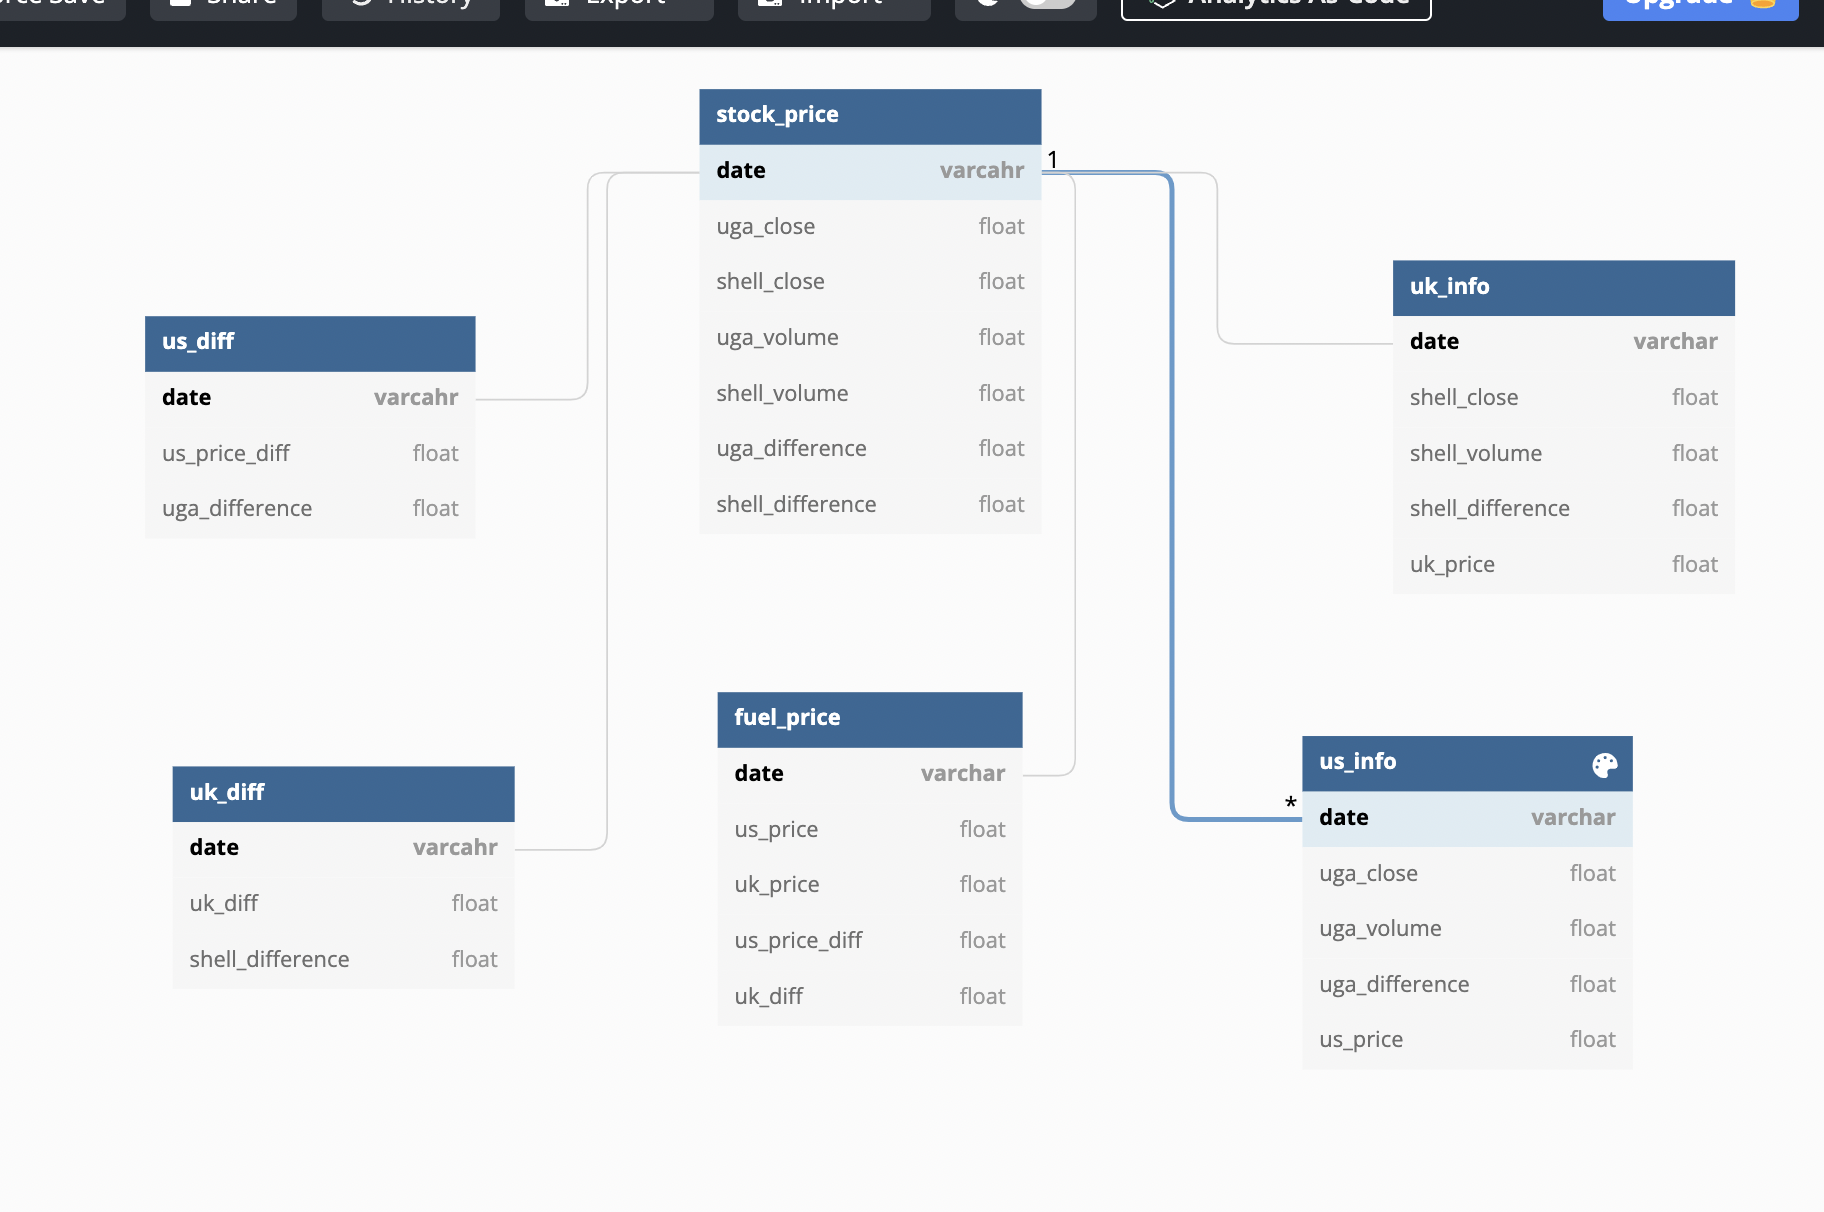

In [70]:
Image("/project/DataEngineering/picture_files/schema.png", width = 600)

In [71]:
# Merge two data frames
fuel_price = pd.merge(us_price, uk_price, on='date')

In [72]:
# Convert into spark data frame
fuel_price = spark.createDataFrame(fuel_price)
fuel_price.printSchema()

# Concert into Parquet format
fuel_price.write.parquet("/project/DataEngineering/parquet_files/fuel_price.parquet", mode = "overwrite")

root
 |-- date: string (nullable = true)
 |-- us_price: double (nullable = true)
 |-- us_price_diff: double (nullable = true)
 |-- uk_price: double (nullable = true)
 |-- uk_diff: double (nullable = true)



In [73]:
make_checkpoint()

In [74]:
new= pd.merge(us_price, uga, on='date')
us_diff = new[['date', 'us_price_diff', 'uga_difference']]
us_diff = spark.createDataFrame(us_diff)
us_diff.printSchema()
us_diff.write.parquet("/project/DataEngineering/parquet_files/us_diff.parquet", mode='overwrite')

root
 |-- date: string (nullable = true)
 |-- us_price_diff: double (nullable = true)
 |-- uga_difference: double (nullable = true)



In [75]:
us_info = new[['date', 'uga_close', 'uga_volume', 'uga_difference', 'us_price']]
us_info =  spark.createDataFrame(us_info)
us_info.printSchema()
us_info.write.parquet("/project/DataEngineering/parquet_files/us_info.parquet", mode='overwrite')

root
 |-- date: string (nullable = true)
 |-- uga_close: double (nullable = true)
 |-- uga_volume: double (nullable = true)
 |-- uga_difference: double (nullable = true)
 |-- us_price: double (nullable = true)



In [76]:
new2= pd.merge(uk_price, shell, on='date')
uk_diff = new2[['date', 'uk_diff', 'shell_difference']]
uk_diff = spark.createDataFrame(uk_diff)
uk_diff.printSchema()
uk_diff.write.parquet("/project/DataEngineering/parquet_files/uk_diff.parquet", mode='overwrite')

root
 |-- date: string (nullable = true)
 |-- uk_diff: double (nullable = true)
 |-- shell_difference: double (nullable = true)



In [77]:
uk_info = new2[['date', 'shell_close', 'shell_volume', 'shell_difference', 'uk_price']]
uk_info = spark.createDataFrame(uk_info)
uk_info.printSchema()
uk_info.write.parquet("/project/DataEngineering/parquet_files/uk_info.parquet", mode='overwrite')

root
 |-- date: string (nullable = true)
 |-- shell_close: double (nullable = true)
 |-- shell_volume: double (nullable = true)
 |-- shell_difference: double (nullable = true)
 |-- uk_price: double (nullable = true)



In [78]:
!PGPASSWORD=qwerty123 psql -h depgdb.crhso94tou3n.eu-west-2.rds.amazonaws.com -d huizihu21 -U huizihu21 -c '\i Schema.sql'


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

psql:Schema.sql:1: NOTICE:  drop cascades to 6 other objects
DETAIL:  drop cascades to table fuel_and_stock_price.stock_price
drop cascades to table fuel_and_stock_price.fuel_price
drop cascades to table fuel_and_stock_price.us_info
drop cascades to table fuel_and_stock_price.uk_info
drop cascades to table fuel_and_stock_price.u

In [79]:
postgres_uri = "jdbc:postgresql://depgdb.crhso94tou3n.eu-west-2.rds.amazonaws.com:5432/huizihu21"
user = "huizihu21"
password = "qwerty123"

In [80]:
stock_price.write.jdbc(url=postgres_uri, table="fuel_and_stock_price.stock_price", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })

fuel_price.write.jdbc(url=postgres_uri, table="fuel_and_stock_price.fuel_price", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })

us_info.write.jdbc(url=postgres_uri, table="fuel_and_stock_price.us_info", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })

uk_info.write.jdbc(url=postgres_uri, table="fuel_and_stock_price.uk_info", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })

us_diff.write.jdbc(url=postgres_uri, table="fuel_and_stock_price.us_diff", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })

uk_diff.write.jdbc(url=postgres_uri, table="fuel_and_stock_price.uk_diff", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })


Even though in this project, we have already cleaned data and got what we needed, there is still chances that other data could be useful later while the data was not available anymore. To make it as a backup, the original dataset were stilled kept in database.

In [81]:
us_fuelprice_df.write.jdbc(url=postgres_uri, table="us_fuelprice_df", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
uk_fuelprice_df.write.jdbc(url=postgres_uri, table="uk_fuelprice_df", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })

## 5.1 SQL Query Example

If a user as a stock investor want to utilize this data set to observe instead of price, but the potential of a stock during a period that energy price is unstable. He may be interested in the differences in the stock price within a time period. Then he could ask for the table which includes the fuel price differences so that he is able to predict how much of the stock price would increase or decrease based on the changing rate of fuel price.

In [82]:
sql = '''
SELECT  us_price_diff, uga_difference, uk_diff, shell_difference
FROM fuel_and_stock_price.us_diff as s

JOIN (SELECT date, uk_diff, shell_difference from fuel_and_stock_price.uk_diff) as k

ON s.date = k.date
'''

In [83]:
sql_df = spark.read \
    .format("jdbc") \
    .option("url", postgres_uri) \
    .option("query", sql) \
    .option("user", user) \
    .option("password", password) \
    .option("driver", "org.postgresql.Driver") \
    .load()

sql_df.printSchema()

root
 |-- us_price_diff: double (nullable = true)
 |-- uga_difference: double (nullable = true)
 |-- uk_diff: double (nullable = true)
 |-- shell_difference: double (nullable = true)



In [84]:
sql_df = sql_df.toPandas()
sql_df

us_price_diff  uga_difference  uk_diff  shell_difference
0            0.008        5.834149    1.547          1.746421
1           -0.030        5.151915    0.978          2.991892
2           -0.039        7.883109    0.656          4.565902
3           -0.031        4.833629    0.795          1.916933
4           -0.004        4.101488    0.582          3.533972
..             ...             ...      ...               ...
271         -0.087       11.040678    7.010          4.861470
272         -0.013        4.797355    5.410          7.974416
273         -0.056        7.920615   -2.718          5.307856
274         -0.077        7.942824   -0.742          4.174354
275         -0.027       11.366301   -0.130          3.809307

[276 rows x 4 columns]

Because of the pandemic since Dec 2019, the whole world has been affected to a great extent, especially traveling, schooling, retailing, etc. suffered a lot. If we want to check how fuel price changed and energy companies’ performance due to the pandemic, it is easy to get information by querying. In this case, we can choose the start date as we want 2019-10-07. By getting the final table, we are able to see how things changed.




In [85]:
sql2 = '''
SELECT  s.date, uga_close, uga_difference, us_price_diff, shell_close, shell_difference, uk_diff
FROM (select * from fuel_and_stock_price.us_info where date > '2019-10-07')as s
JOIN( select date, us_price_diff from fuel_and_stock_price.us_diff) as f
ON s.date = f.date
JOIN (select date, shell_close from fuel_and_stock_price.uk_info) as k 
ON s.date = k.date
JOIN (select date, shell_difference, uk_diff from fuel_and_stock_price.uk_diff) as t
ON k.date = t.date
'''

In [86]:
sql2_df = spark.read \
    .format("jdbc") \
    .option("url", postgres_uri) \
    .option("query", sql2) \
    .option("user", user) \
    .option("password", password) \
    .option("driver", "org.postgresql.Driver") \
    .load()

sql2_df.printSchema()

root
 |-- date: string (nullable = true)
 |-- uga_close: double (nullable = true)
 |-- uga_difference: double (nullable = true)
 |-- us_price_diff: double (nullable = true)
 |-- shell_close: double (nullable = true)
 |-- shell_difference: double (nullable = true)
 |-- uk_diff: double (nullable = true)



In [87]:
sql2_df.toPandas()

date  uga_close  uga_difference  us_price_diff  shell_close  \
0    2019-10-14  30.000000        2.100003          0.016  2240.000000   
1    2019-10-21  31.139999        5.780350         -0.042  2325.500000   
2    2019-10-28  31.540001        5.009512          0.016  2260.500000   
3    2019-11-04  31.170000        5.646458          0.008  2341.000000   
4    2019-11-11  31.160000        2.342747         -0.019  2308.000000   
..          ...        ...             ...            ...          ...   
126  2022-03-14  56.790001       11.040678         -0.087  1941.800049   
127  2022-03-21  60.450001        4.797355         -0.013  2110.500000   
128  2022-03-28  55.930000        7.920615         -0.056  2119.500000   
129  2022-04-04  55.270000        7.942824         -0.077  2168.000000   
130  2022-04-11  59.650002       11.366301         -0.027  2192.000000   

     shell_difference  uk_diff  
0            4.374553    0.000  
1           99.179187   -0.504  
2            4.954656   -0.637  
3          100.510679   -0.207  
4          100.870884    0.000  
..                ...      ...  
126          4.861470    7.010  
127          7.974416    5.410  
128          5.307856   -2.718  
129          4.174354   -0.742  
130          3.809307   -0.130  

[131 rows x 7 columns]

In [88]:
# Stop the Spark 
spark.stop()

# 6.0 Machine Learning
Machine learning, as a part of Artificial Intelligence and growing industry, are getting popular everywhere. Allowing a machine to find the pattern in instances or statistics according to past data, machine learning can generate models to help predict future world. In this project, we aim to predict the future fuel price, which is a supervised learning task and at the same time, a regression problem. Therefore, linear regression has been introduced with a result of RMSE (Root-Mean-Square Deviation) 0.114808 and R-Squared on test set 0.958442. In general, this is a amazing model since the error is not too much while almost 95.84% of variance for U.S. fuel price can be explained by this model. We strongly believe that this model can be used later to predict the fuel price. 

## 6.1 EDA (Exploratory Data Analysis)
In terms of process, we first generated a data frame with needed data and did some data visualization trying to get some insights of relationship among dependent variable and independent variables. A heat map has been graphed to see the correlations between any two variables, it is necessary to make sure that two dependent variables in a model are not highly correlated, otherwise it would cause perfect collinearity and harm the accuracy of the model.
Then the relationships between UK fuel price and U.S. fuel price, UGA stock price and U.S. fuel price were graphed. As we can see, U.S. fuel price does have linear, positive relationship with the two variables, it could be a good idea to fit our data into a linear regression model, even though the UGA stock volume seems not have an impact on fuel price. Undoubtedly, look at the U.S. fuel price and UGA stock price in different time periods, they shared a very similar pattern. 




In [89]:
us_info = pd.read_parquet('/project/DataEngineering/parquet_files/us_info.parquet',engine = 'pyarrow')
us_info.head()

date  uga_close  uga_volume  uga_difference  us_price
0  2012-04-16  54.849998    517500.0        3.117599     3.923
1  2012-04-23  55.119999    412200.0        2.322204     3.861
2  2012-04-30  52.259998    694200.0        6.486797     3.821
3  2012-05-07  52.750000    533400.0        2.976301     3.773
4  2012-05-14  50.549999    231800.0        3.521272     3.713

In [90]:
uk_info = pd.read_parquet('/project/DataEngineering/parquet_files/uk_info.parquet',engine = 'pyarrow')
uk_info.head()

date  shell_close  shell_volume  shell_difference    uk_price
0  2017-01-02       2267.5    17476669.0          1.746421  117.000035
1  2017-01-09       2281.5    22334907.0          2.991892  117.978433
2  2017-01-16       2223.0    22697715.0          4.565902  118.634272
3  2017-01-23       2191.0    22955827.0          1.916933  119.429013
4  2017-01-30       2193.0    31713544.0          3.533972  120.011224

In [91]:
df = pd.merge(us_info, uk_info, on='date')
df.head()

date  uga_close  uga_volume  uga_difference  us_price  shell_close  \
0  2017-01-02  30.510000    147400.0        5.834149     2.429       2267.5   
1  2017-01-09  30.280001    262900.0        5.151915     2.437       2281.5   
2  2017-01-16  29.430000    132000.0        7.883109     2.407       2223.0   
3  2017-01-23  28.549999    179400.0        4.833629     2.368       2191.0   
4  2017-01-30  28.770000    257200.0        4.101488     2.337       2193.0   

   shell_volume  shell_difference    uk_price  
0    17476669.0          1.746421  117.000035  
1    22334907.0          2.991892  117.978433  
2    22697715.0          4.565902  118.634272  
3    22955827.0          1.916933  119.429013  
4    31713544.0          3.533972  120.011224

In [92]:
# Check missing value
df.isna().sum()

date                0
uga_close           0
uga_volume          0
uga_difference      0
us_price            0
shell_close         0
shell_volume        0
shell_difference    0
uk_price            0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 275
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              276 non-null    object 
 1   uga_close         276 non-null    float64
 2   uga_volume        276 non-null    float64
 3   uga_difference    276 non-null    float64
 4   us_price          276 non-null    float64
 5   shell_close       276 non-null    float64
 6   shell_volume      276 non-null    float64
 7   shell_difference  276 non-null    float64
 8   uk_price          276 non-null    float64
dtypes: float64(8), object(1)
memory usage: 21.6+ KB


<ipython-input-94-bfdcaf43dabc>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Figure size 1800x1080 with 0 Axes>

<AxesSubplot:>

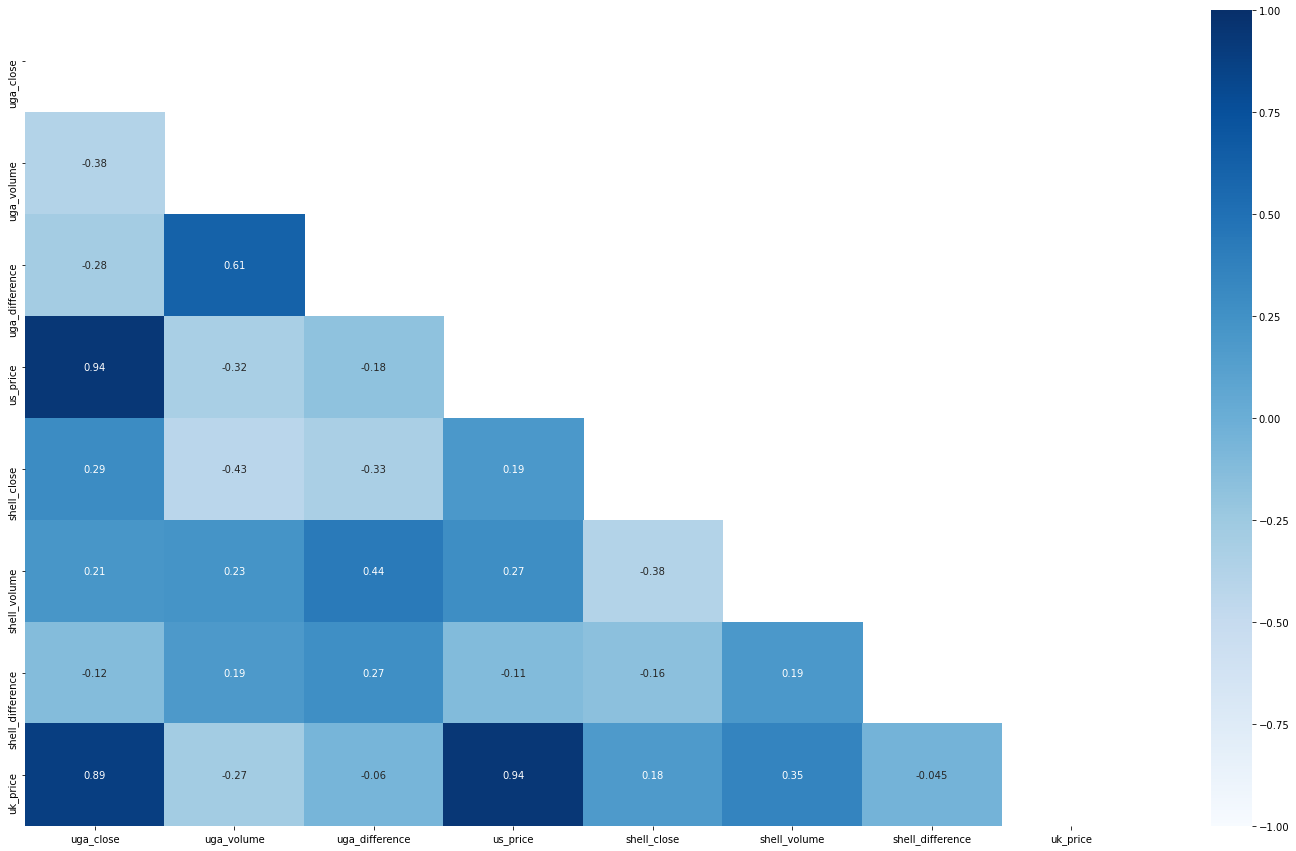

In [94]:
# Correlation map
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(25, 15))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')

<AxesSubplot:xlabel='us_price', ylabel='uk_price'>

<AxesSubplot:xlabel='us_price', ylabel='uga_close'>

<AxesSubplot:xlabel='us_price', ylabel='uga_volume'>

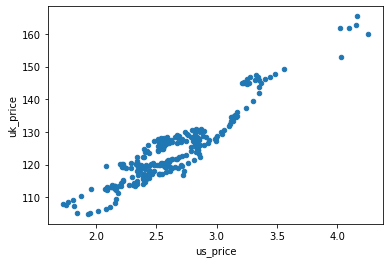

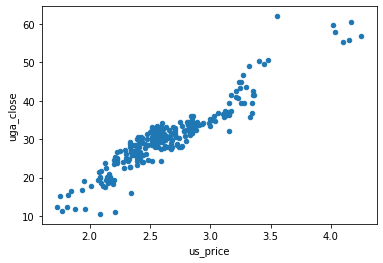

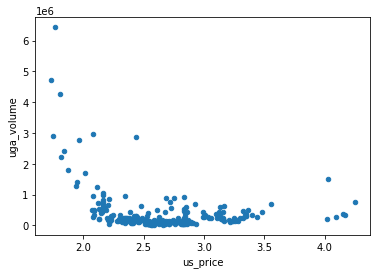

In [95]:
df.plot.scatter(x='us_price', y='uk_price')

df.plot.scatter(x='us_price', y='uga_close')

df.plot.scatter(x='us_price', y='uga_volume')

<AxesSubplot:title={'center':'Historical stock prices of UGA. [16-04-2012 to 11-04-2022]'}, xlabel='date'>

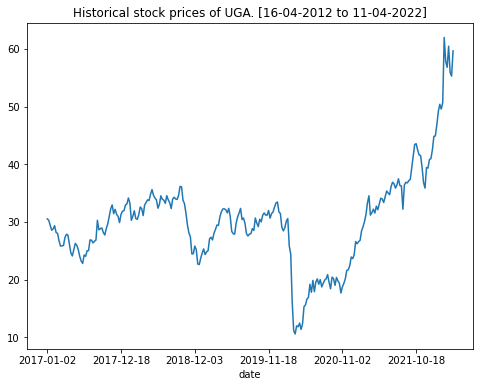

In [96]:
df = df.set_index('date', drop = True)
df['uga_close'].plot(figsize=(8,6), title = "Historical stock prices of UGA. [16-04-2012 to 11-04-2022]")

In [97]:
df['us_price'].plot(figsize=(8,6), title = "US Fuel Price")

<AxesSubplot:title={'center':'US Fuel Price'}, xlabel='date'>

## 6.2 Linear Regression Model

In [98]:
conf = SparkConf().setMaster("local").setAppName("Linear Regression - US fuel Price")
sc = SparkContext(conf=conf)
sqlContext = SQLContext(sc)

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [99]:
csv_file = df.to_csv('/project/DataEngineering/fuel_price.csv', index=False)

In [100]:
df_spark = sqlContext.read.format('com.databricks.spark.csv').options(header = 'true', inferschema = 'true').load('/project/DataEngineering/fuel_price.csv')
df_spark.printSchema()
df_spark.show(10)

root
 |-- uga_close: double (nullable = true)
 |-- uga_volume: double (nullable = true)
 |-- uga_difference: double (nullable = true)
 |-- us_price: double (nullable = true)
 |-- shell_close: double (nullable = true)
 |-- shell_volume: double (nullable = true)
 |-- shell_difference: double (nullable = true)
 |-- uk_price: double (nullable = true)

+---------+----------+------------------+--------+-----------+------------+------------------+------------------+
|uga_close|uga_volume|    uga_difference|us_price|shell_close|shell_volume|  shell_difference|          uk_price|
+---------+----------+------------------+--------+-----------+------------+------------------+------------------+
|    30.51|  147400.0|5.8341494591936955|   2.429|     2267.5| 1.7476669E7| 1.746421080485111|        117.000035|
|30.280001|  262900.0| 5.151915285603851|   2.437|     2281.5| 2.2334907E7|2.9918917378917365|117.97843300000001|
|    29.43|  132000.0| 7.883109072375125|   2.407|     2223.0| 2.2697715E7| 4.56

In [101]:
independent_variables = ['uga_close', 'uga_volume', 'uga_difference','shell_close', 'shell_volume', 'shell_difference', 'uk_price']
dependent_variable = ['us_price']
us_fuel_price_df = df_spark.select( independent_variables + dependent_variable ) 
for i in us_fuel_price_df.columns:
        print( "Correlation to us_price for ", i, us_fuel_price_df.stat.corr('us_price', i))

Correlation to us_price for  uga_close 0.9390585947321328
Correlation to us_price for  uga_volume -0.3184910831222315
Correlation to us_price for  uga_difference -0.17535255348407247
Correlation to us_price for  shell_close 0.1916426998020561
Correlation to us_price for  shell_volume 0.27496771801767156
Correlation to us_price for  shell_difference -0.11140479524869386
Correlation to us_price for  uk_price 0.9381312764674431
Correlation to us_price for  us_price 1.0


In [102]:
multivariate_feature_columns = ['uga_close','uk_price', 'shell_close', 'uga_difference']
multivariate_label_column = 'us_price'
vector_assembler = VectorAssembler(inputCols = multivariate_feature_columns, outputCol = 'features')
us_fuel_price_features_df = vector_assembler.transform(us_fuel_price_df).select(['features', multivariate_label_column])
us_fuel_price_features_df.head(10)

[Row(features=DenseVector([30.51, 117.0, 2267.5, 5.8341]), us_price=2.429),
 Row(features=DenseVector([30.28, 117.9784, 2281.5, 5.1519]), us_price=2.437),
 Row(features=DenseVector([29.43, 118.6343, 2223.0, 7.8831]), us_price=2.407),
 Row(features=DenseVector([28.55, 119.429, 2191.0, 4.8336]), us_price=2.368),
 Row(features=DenseVector([28.77, 120.0112, 2193.0, 4.1015]), us_price=2.337),
 Row(features=DenseVector([29.34, 120.1771, 2166.5, 8.214]), us_price=2.333),
 Row(features=DenseVector([28.15, 120.1517, 2095.0, 4.4405]), us_price=2.34),
 Row(features=DenseVector([28.0, 120.1989, 2073.0, 3.3929]), us_price=2.336),
 Row(features=DenseVector([26.7, 120.1217, 2137.5, 7.4157]), us_price=2.346),
 Row(features=DenseVector([25.8, 120.0195, 2113.5, 7.0155]), us_price=2.375)]

In [103]:
train_df, test_df = us_fuel_price_features_df.randomSplit([0.8, 0.2], seed=48)
train_df.count(), test_df.count()

(226, 50)

In [104]:
linear_regression = LinearRegression(featuresCol = 'features', labelCol = multivariate_label_column)
linear_regression_model = linear_regression.fit(train_df)

In [105]:
print("Model Coefficients: " + str(linear_regression_model.coefficients))
print("Intercept: " + str(linear_regression_model.intercept))
training_summary = linear_regression_model.summary
print("RMSE: %f" % training_summary.rootMeanSquaredError)
print("R-SQUARED: %f" % training_summary.r2)
print("TRAINING DATASET DESCRIPTIVE SUMMARY: ")
train_df.describe().show()
print("TRAINING DATASET RESIDUALS: ")
training_summary.residuals.show()

Model Coefficients: [0.026009875685764298,0.019689607540594525,-5.288776235708892e-05,-0.002729701818434651]
Intercept: -0.4811308304174569
RMSE: 0.105582
R-SQUARED: 0.935072
TRAINING DATASET DESCRIPTIVE SUMMARY: 
+-------+-------------------+
|summary|           us_price|
+-------+-------------------+
|  count|                226|
|   mean|  2.639429203539823|
| stddev|0.41527707145554793|
|    min|              1.731|
|    max|              4.252|
+-------+-------------------+

TRAINING DATASET RESIDUALS: 


/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+--------------------+
|           residuals|
+--------------------+
| 0.08789479895747965|
| 0.14734172047235816|
|-0.04129093807397277|
|0.012087865090286476|
|-0.11290802301932712|
|-0.07751917931757513|
|-0.11734061218418512|
| -0.0847039429114338|
|0.001947692446344...|
|0.003247478853044772|
|  0.1354429137633173|
|0.032336752474142916|
|-0.06122778879654778|
|-0.00748284855279...|
|-0.01957680857819...|
|-0.05047115028919...|
|-0.00988226612096...|
|-0.07614964325225992|
|0.024866112315334643|
| 0.09344376291959966|
+--------------------+
only showing top 20 rows



In [106]:
# Evaluate the performance of our Linear Regression Model on the Test DataFrame
test_summary = linear_regression_model.evaluate(test_df)
print("RMSE on Test Data = %g" % test_summary.rootMeanSquaredError)
print("R-SQUARED on Test Data = %g" % test_summary.r2)

RMSE on Test Data = 0.118572
R-SQUARED on Test Data = 0.933631


In [107]:
# Stop the Spark Context
sc.stop()

# 7.0 Conclusion

Overall, this project almost completes its initial goals. The data has been gathered through web scraping from APIs and downloading locally. It is always vital to find the most efficient way to collect data by analyzing its attributes, which benefits to improve work efficiency as well as time and financial cost. Merging and storing four datasets could be messy and thanks to schema and parquet, our collected date types are converted into one, which makes the data more manageable and trackable. 

Throughout the whole project, Git and Terraform were used to keep track our files and to make sure everything is on the right track. Terraform has created automating environment while Git tracked changes to files and codes, the combination had improved the consistency and accuracy for the project. What’s more, Git allows others to have access to this work so people can communicate and share ideas to each other. At the same time, DVC also was used to check every change has been made to dataset and files. All of these tools will make big difference especially when you handle a high volume of data as a data  engineer.

Moreover, machine learning, as an application of data, provided us lots of information. EDA gived us chance to gain insights in our data while model let us know what could happen in the future. The invasion is still on, we really need to realize what will be happen in the future, not only fuel price, but also food, medicine, necessities and education cost. Hence, prediction is necessary. The linear regression model will tell the story once we have dependent variable values.


# 8.0 Limitation

Even though this project has done a lot, many things could be improved. First of all, the dataset size could be larger. More features should be included like other energies’ price within the same period and food price. About companies, the two companies are quite reputable and representative in corresponding countries, more companies should be taken into account, at the same time, more dimensions data would enlarge the dataset so that machine learning model has more instances to study. 

In machine learning sector, more models should be conducted. This is a typical time series problem, so time series analysis can be conducted, sequentially we can even forecast the future value and get future fuel price pattern. For linear regression model, even though machine has perfectly learned the past data and made perfect prediction, it is hard for us to further improve our model since there is no hyperparameters in linear regression model. On the other hand, there is not much space left to fine tune our model. 


# Reference

Kirby, P. (2022, April 17). Why has Russia invaded Ukraine and what does Putin want? BBC News. Retrieved April 24, 2022, from https://www.bbc.co.uk/news/world-europe-56720589
https://www.bbc.co.uk/news/world-europe-56720589
